In [6]:
import pandas as pd

file_paths = ['附件1.csv', '附件2.csv', '附件3.csv', '附件4.csv']

data_frames_gb2312 = [pd.read_csv(file_path, encoding='GB2312') for file_path in file_paths]


for i, df in enumerate(data_frames_gb2312, start=1):
    print(f"Data from 附件{i} :")
    print(df.head(), "\n")



Data from 附件1 :
   分拣中心          日期    货量
0  SC48    2023/9/5   723
1  SC48  2023/10/24  2092
2  SC48    2023/8/5   754
3  SC48  2023/11/16   754
4  SC48   2023/11/9   771 

Data from 附件2 :
   分拣中心          日期  小时   货量
0  SC54   2023/11/6  19  784
1  SC54  2023/11/21   5   72
2  SC54  2023/11/30  12  209
3  SC54  2023/11/13   1  520
4  SC54   2023/11/4  12  278 

Data from 附件3 :
  始发分拣中心 到达分拣中心   货量
0   SC22    SC8  296
1   SC18    SC8  213
2    SC7    SC8  240
3   SC15    SC8  172
4   SC52    SC8   72 

Data from 附件4 :
  始发分拣中心 到达分拣中心
0    SC7    SC8
1   SC30    SC8
2   SC22    SC8
3   SC44    SC8
4    SC4    SC8 



In [12]:
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('附件1.csv', encoding='GB2312')

encoder = OneHotEncoder()
center_encoded = encoder.fit_transform(data[['分拣中心']]).toarray()  # 使用.toarray()将稀疏矩阵转换为密集矩阵

# 将编码后的数据转换为DataFrame，并添加回原始数据集
center_encoded_df = pd.DataFrame(center_encoded, columns=encoder.get_feature_names_out())
data = data.reset_index(drop=True)
data_encoded = pd.concat([data.drop('分拣中心', axis=1), center_encoded_df], axis=1)

# 显示处理后的数据前几行
data_encoded.head()


日期    货量  分拣中心_SC1  分拣中心_SC10  分拣中心_SC12  分拣中心_SC14  分拣中心_SC15  \
0    2023/9/5   723       0.0        0.0        0.0        0.0        0.0   
1  2023/10/24  2092       0.0        0.0        0.0        0.0        0.0   
2    2023/8/5   754       0.0        0.0        0.0        0.0        0.0   
3  2023/11/16   754       0.0        0.0        0.0        0.0        0.0   
4   2023/11/9   771       0.0        0.0        0.0        0.0        0.0   

   分拣中心_SC16  分拣中心_SC17  分拣中心_SC18  ...  分拣中心_SC58  分拣中心_SC6  分拣中心_SC60  \
0        0.0        0.0        0.0  ...        0.0       0.0        0.0   
1        0.0        0.0        0.0  ...        0.0       0.0        0.0   
2        0.0        0.0        0.0  ...        0.0       0.0        0.0   
3        0.0        0.0        0.0  ...        0.0       0.0        0.0   
4        0.0        0.0        0.0  ...        0.0       0.0        0.0   

   分拣中心_SC61  分拣中心_SC63  分拣中心_SC66  分拣中心_SC68  分拣中心_SC7  分拣中心_SC8  分拣中心_SC9  
0        0.0        0.0        0.0        0.0       0.0       0.0       0.0  
1        0.0        0.0        0.0        0.0       0.0       0.0       0.0  
2        0.0        0.0        0.0        0.0       0.0       0.0       0.0  
3        0.0        0.0        0.0        0.0       0.0       0.0       0.0  
4        0.0        0.0        0.0        0.0       0.0       0.0       0.0  

[5 rows x 59 columns]

Epoch 1/100
120/120 - 1s - loss: 0.0216 - 928ms/epoch - 8ms/step
Epoch 2/100
120/120 - 0s - loss: 0.0180 - 89ms/epoch - 746us/step
Epoch 3/100
120/120 - 0s - loss: 0.0177 - 81ms/epoch - 678us/step
Epoch 4/100
120/120 - 0s - loss: 0.0176 - 88ms/epoch - 732us/step
Epoch 5/100
120/120 - 0s - loss: 0.0175 - 82ms/epoch - 680us/step
Epoch 6/100
120/120 - 0s - loss: 0.0174 - 81ms/epoch - 675us/step
Epoch 7/100
120/120 - 0s - loss: 0.0175 - 84ms/epoch - 702us/step
Epoch 8/100
120/120 - 0s - loss: 0.0173 - 83ms/epoch - 692us/step
Epoch 9/100
120/120 - 0s - loss: 0.0172 - 76ms/epoch - 632us/step
Epoch 10/100
120/120 - 0s - loss: 0.0172 - 91ms/epoch - 761us/step
Epoch 11/100
120/120 - 0s - loss: 0.0172 - 83ms/epoch - 695us/step
Epoch 12/100
120/120 - 0s - loss: 0.0172 - 86ms/epoch - 716us/step
Epoch 13/100
120/120 - 0s - loss: 0.0172 - 83ms/epoch - 692us/step
Epoch 14/100
120/120 - 0s - loss: 0.0171 - 82ms/epoch - 681us/step
Epoch 15/100
120/120 - 0s - loss: 0.0171 - 84ms/epoch - 701us/step
Epoch

C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36135 (\N{CJK UNIFIED IDEOGRAPH-8D27}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabt

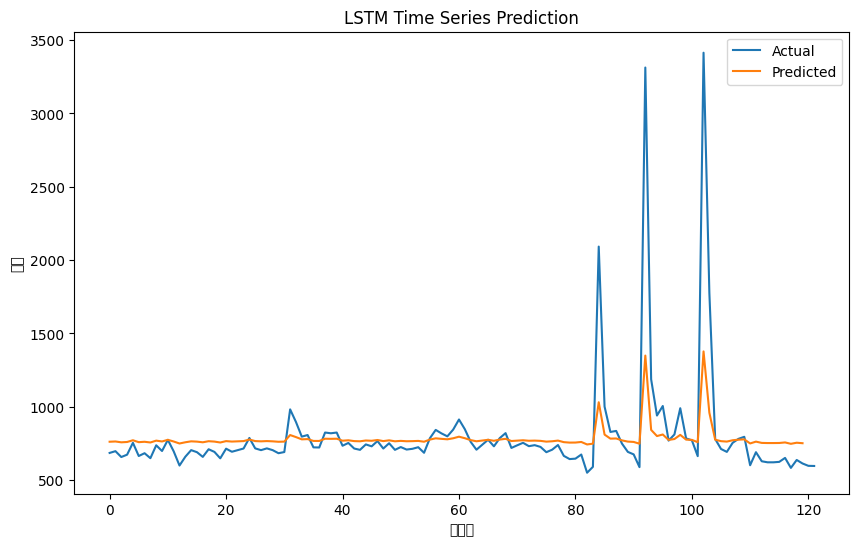

In [14]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

# 数据加载
data = pd.read_csv('附件1.csv', encoding='GB2312')
data['日期'] = pd.to_datetime(data['日期'])
data = data.sort_values('日期')

# 仅使用SC48分拣中心的数据作为示例
data_example = data[data['分拣中心'] == 'SC48'].groupby('日期')['货量'].sum().reset_index()

# 数据标准化
scaler = MinMaxScaler(feature_range=(0, 1))
data_example['货量'] = scaler.fit_transform(data_example[['货量']])

# 将时间序列数据转换为监督学习问题
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        X.append(a)
        Y.append(dataset[i + look_back])
    return np.array(X), np.array(Y)

look_back = 1
scaled = data_example['货量'].values
X, Y = create_dataset(scaled, look_back)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

# 构建LSTM模型
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# 模型训练
model.fit(X, Y, epochs=100, batch_size=1, verbose=2)

# 进行预测
train_predict = model.predict(X)

# 反转预测值以便可视化
train_predict = scaler.inverse_transform(train_predict)
Y_inverse = scaler.inverse_transform([Y])

# 计算性能指标
train_score = np.sqrt(mean_squared_error(Y_inverse[0], train_predict[:,0]))
print('Train Score: %.2f RMSE' % (train_score))

# 可视化展示
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(scaled.reshape(-1,1)))
plt.plot(train_predict)
plt.title('LSTM Time Series Prediction')
plt.ylabel('货量')
plt.xlabel('时间点')
plt.legend(['Actual', 'Predicted'], loc='upper right')
plt.show()


In [17]:
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import csv
from datetime import datetime, timedelta

# 数据加载和预处理函数
def load_and_preprocess_data(filepath, center_id):
    data = pd.read_csv(filepath, encoding='GB2312')
    data['日期'] = pd.to_datetime(data['日期'])
    data_center = data[data['分拣中心'] == center_id].groupby('日期')['货量'].sum().reset_index()
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_center_scaled = scaler.fit_transform(data_center[['货量']])
    return data_center_scaled, scaler

# 创建数据集
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# 训练模型并进行预测
def train_and_predict(filepath, center_id, look_back=1, days=30):
    scaled_data, scaler = load_and_preprocess_data(filepath, center_id)
    X, Y = create_dataset(scaled_data, look_back)
    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

    model = Sequential([LSTM(4, input_shape=(1, look_back)), Dense(1)])
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X, Y, epochs=100, batch_size=1, verbose=0)

    predictions = predict_future(model, scaled_data, scaler, look_back, days)
    return predictions

# 预测未来30天
def predict_future(model, data, scaler, look_back, days):
    last_batch = data[-look_back:].reshape((1, look_back, 1))
    predictions = []
    for _ in range(days):
        pred = model.predict(last_batch)[0]
        predictions.append(pred)
        last_batch = np.append(last_batch[:, 1:, :], [[pred]], axis=1)
    return scaler.inverse_transform(predictions)

# 保存预测结果到CSV
def save_predictions_to_csv(results, start_date, csv_path):
    with open(csv_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['分拣中心', '日期', '预测货量'])
        for center_id, preds in results.items():
            for i, pred in enumerate(preds):
                writer.writerow([center_id, (start_date + timedelta(days=i)).strftime('%Y-%m-%d'), pred[0]])

# 主逻辑
data_path = '附件1.csv'  
results_csv_path = '结果表1.csv' 
centers = pd.read_csv(data_path, encoding='GB2312')['分拣中心'].unique()
results = {}
start_date = datetime.now()

for center_id in centers:
    predictions = train_and_predict(data_path, center_id)
    results[center_id] = predictions

save_predictions_to_csv(results, start_date, results_csv_path)
print("预测结果已保存到", results_csv_path)


1/1 [==============================] - 0s 20ms/step
预测结果已保存到 结果表1.csv


Epoch 1/20


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\1582136509.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


400/400 - 2s - loss: 0.0200 - 2s/epoch - 4ms/step
Epoch 2/20
400/400 - 1s - loss: 0.0167 - 980ms/epoch - 2ms/step
Epoch 3/20
400/400 - 1s - loss: 0.0140 - 980ms/epoch - 2ms/step
Epoch 4/20
400/400 - 1s - loss: 0.0137 - 977ms/epoch - 2ms/step
Epoch 5/20
400/400 - 1s - loss: 0.0129 - 962ms/epoch - 2ms/step
Epoch 6/20
400/400 - 1s - loss: 0.0129 - 961ms/epoch - 2ms/step
Epoch 7/20
400/400 - 1s - loss: 0.0119 - 1s/epoch - 3ms/step
Epoch 8/20
400/400 - 1s - loss: 0.0121 - 983ms/epoch - 2ms/step
Epoch 9/20
400/400 - 1s - loss: 0.0114 - 978ms/epoch - 2ms/step
Epoch 10/20
400/400 - 1s - loss: 0.0110 - 979ms/epoch - 2ms/step
Epoch 11/20
400/400 - 1s - loss: 0.0117 - 979ms/epoch - 2ms/step
Epoch 12/20
400/400 - 1s - loss: 0.0108 - 977ms/epoch - 2ms/step
Epoch 13/20
400/400 - 1s - loss: 0.0105 - 981ms/epoch - 2ms/step
Epoch 14/20
400/400 - 1s - loss: 0.0113 - 989ms/epoch - 2ms/step
Epoch 15/20
400/400 - 1s - loss: 0.0106 - 984ms/epoch - 2ms/step
Epoch 16/20
400/400 - 1s - loss: 0.0107 - 1s/epoch 

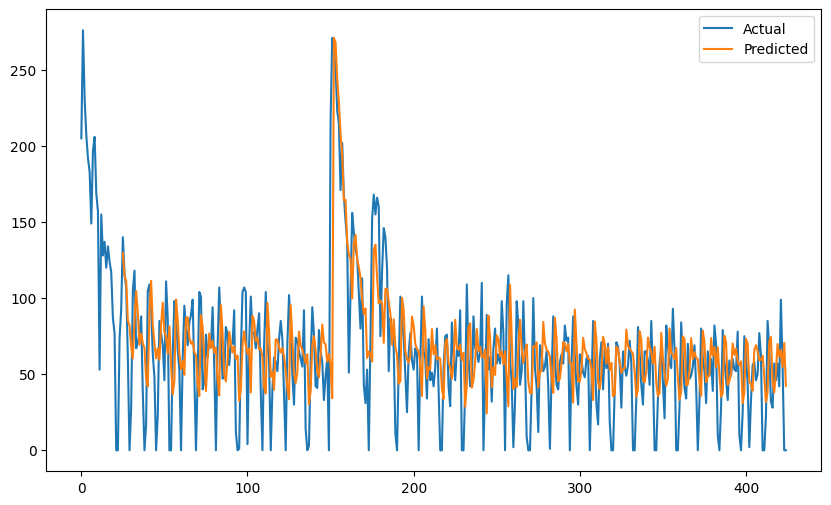

In [18]:
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from datetime import datetime, timedelta

# 数据加载
data_path = '附件2.csv'
data = pd.read_csv(data_path, encoding='GB2312')
data['日期'] = pd.to_datetime(data['日期'])
data.sort_values(['日期', '小时'], inplace=True)

center_id = 'SC48'
data_center = data[data['分拣中心'] == center_id]

# 数据预处理

scaler = MinMaxScaler(feature_range=(0, 1))
data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])

# 创建数据集
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset.iloc[i:(i + look_back)].values
        X.append(a)
        Y.append(dataset.iloc[i + look_back].values)
    return np.array(X), np.array(Y)

look_back = 24  # 以24小时的数据作为输入
X, Y = create_dataset(data_center[['小时', 'scaled_货量']], look_back)

# 构建LSTM模型
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 2)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 模型训练
model.fit(X, Y[:, 1], epochs=20, batch_size=1, verbose=2)  # 使用Y的货量部分作为标签

# 进行预测
predictions = model.predict(X)

# 反转预测结果以便可视化
predictions_inverse = scaler.inverse_transform(np.concatenate((X[:,-1,0].reshape(-1,1), predictions), axis=1))[:,1]

# 可视化
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(data_center['货量'].values, label='Actual')
plt.plot(np.arange(look_back + 1, look_back + 1 + len(predictions)), predictions_inverse, label='Predicted')
plt.legend()
plt.show()


RMSE: 32.685882254659


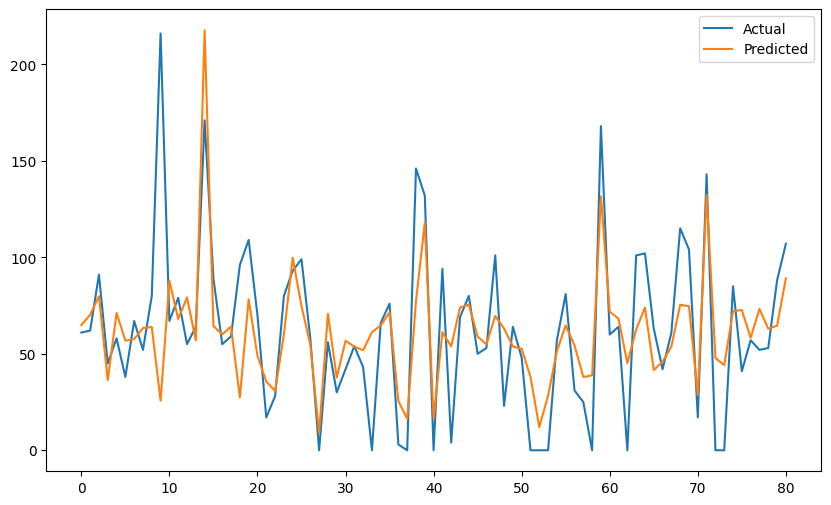

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 数据加载和预处理
data_path = '附件2.csv'
data = pd.read_csv(data_path, encoding='GB2312')
data['日期'] = pd.to_datetime(data['日期'])
data.sort_values(['日期', '小时'], inplace=True)

# 选择一个分拣中心作为示例
center_id = 'SC48'
data_center = data[data['分拣中心'] == center_id]

# 特征工程：创建基于过去24小时的数据特征和标签
def create_features_labels(data, look_back=24):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data.iloc[i:i+look_back]['货量'].values)
        Y.append(data.iloc[i+look_back]['货量'])
    return np.array(X), np.array(Y)

X, Y = create_features_labels(data_center, look_back=24)

# 数据标准化
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y.reshape(-1, 1)).ravel()

# 划分训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 使用随机森林模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# 预测
predictions = model.predict(X_test)

# 反标准化预测结果以便可视化
predictions_inverse = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
Y_test_inverse = scaler.inverse_transform(Y_test.reshape(-1, 1)).flatten()

# 计算RMSE
rmse = np.sqrt(mean_squared_error(Y_test_inverse, predictions_inverse))
print(f'RMSE: {rmse}')

# 可视化
plt.figure(figsize=(10,6))
plt.plot(Y_test_inverse, label='Actual')
plt.plot(predictions_inverse, label='Predicted')
plt.legend()
plt.show()


In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import csv
from datetime import datetime, timedelta

# 数据加载
data_path = '附件2.csv'
data = pd.read_csv(data_path, encoding='GB2312')
data['日期'] = pd.to_datetime(data['日期'])
data.sort_values(['日期', '小时'], inplace=True)

# 数据预处理函数
def preprocess_data(data, center_id):
    data_center = data[data['分拣中心'] == center_id].copy()  # 使用 .copy() 避免警告
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_center.loc[:, 'scaled_货量'] = scaler.fit_transform(data_center[['货量']])
    return data_center, scaler

# 创建数据集
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset.iloc[i:(i + look_back)][['小时', 'scaled_货量']].values
        X.append(a.flatten())  # 将数据扁平化以适应随机森林模型
        Y.append(dataset.iloc[i + look_back]['scaled_货量'])
    return np.array(X), np.array(Y)

# 构建并训练模型
def build_and_train_model(data_center, look_back=24):
    X, Y = create_dataset(data_center, look_back)
    model = RandomForestRegressor(n_estimators=100, random_state=80)
    model.fit(X, Y)
    return model, X, scaler  # 返回训练好的模型和最后的输入X以及scaler

# 主逻辑
results_csv_path = '结果表2-24小时.csv'
with open(results_csv_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['分拣中心', '日期', '小时', '预测货量'])

    for center_id in data['分拣中心'].unique():
        print(f"Processing {center_id}...")
        data_center, scaler = preprocess_data(data, center_id)
        model, X, scaler = build_and_train_model(data_center, look_back=24)
        
        # 使用最后24小时数据进行预测
        last_data = X[-1].reshape(1, -1)  # 重塑形状以匹配模型的输入期望
        predictions_scaled = model.predict(last_data)
        predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1))[:, 0]
        
        predict_date = data_center['日期'].max() + timedelta(days=1)
        for hour in range(24):
            writer.writerow([center_id, predict_date.strftime('%Y-%m-%d'), hour+1, predictions[0]])  # 修正为 predictions[0] 使用单一预测值填充24小时

print("预测结果已保存到", results_csv_path)


Processing SC54...
Processing SC32...
Processing SC49...
Processing SC66...
Processing SC68...
Processing SC51...
Processing SC60...
Processing SC1...
Processing SC22...
Processing SC57...
Processing SC17...
Processing SC35...
Processing SC7...
Processing SC40...
Processing SC47...
Processing SC38...
Processing SC15...
Processing SC56...
Processing SC55...
Processing SC39...
Processing SC25...
Processing SC53...
Processing SC18...
Processing SC6...
Processing SC30...
Processing SC34...
Processing SC44...
Processing SC21...
Processing SC48...
Processing SC9...
Processing SC23...
Processing SC27...
Processing SC29...
Processing SC63...
Processing SC31...
Processing SC2...
Processing SC16...
Processing SC24...
Processing SC41...
Processing SC61...
Processing SC10...
Processing SC58...
Processing SC3...
Processing SC8...
Processing SC19...
Processing SC43...
Processing SC12...
Processing SC4...
Processing SC52...
Processing SC5...
Processing SC28...
Processing SC26...
Processing SC14...
Pr

In [ ]:
#预测24小时 LSTM时间较长
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from datetime import datetime, timedelta

# 加载数据
data_path = '附件2.csv'  
data = pd.read_csv(data_path, encoding='GB2312')
data['日期'] = pd.to_datetime(data['日期'])
data.sort_values(['日期', '小时'], inplace=True)

# 数据预处理函数
def preprocess_data(data, center_id):
    data_center = data[data['分拣中心'] == center_id]
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])
    return data_center, scaler

# 创建数据集
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset.iloc[i:(i + look_back)][['小时', 'scaled_货量']].values
        X.append(a)
        Y.append(dataset.iloc[i + look_back]['scaled_货量'])
    return np.array(X), np.array(Y)

# 构建并训练模型
def build_and_train_model(data_center, look_back=24):
    X, Y = create_dataset(data_center, look_back)
    model = Sequential()
    model.add(LSTM(50, input_shape=(look_back, 2)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, Y, epochs=20, batch_size=1, verbose=2)
    return model

# 保存预测结果到CSV文件
results_csv_path = '结果表2-24小时.csv' 
with open(results_csv_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['分拣中心', '日期', '小时', '预测货量'])

    for center_id in data['分拣中心'].unique():
        print(f"Processing {center_id}...")
        data_center, scaler = preprocess_data(data, center_id)
        model = build_and_train_model(data_center, look_back=24)
        
        # 假设进行未来一天的预测，即24小时
        last_24_hours = data_center.tail(24)[['小时', 'scaled_货量']].values.reshape(1, 24, 2)
        predictions_scaled = model.predict(last_24_hours)
        predictions = scaler.inverse_transform(np.concatenate((last_24_hours[0, :, 0].reshape(-1, 1), predictions_scaled), axis=1))[:, 1]
        
        # 写入CSV
        predict_date = data_center['日期'].max() + timedelta(days=1)
        for hour, pred in enumerate(predictions, start=1):
            writer.writerow([center_id, predict_date.strftime('%Y-%m-%d'), hour, pred])

print("预测结果已保存到", results_csv_path)


In [27]:
#仅预测30*24小时 LSTM时间较长
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import csv
from datetime import datetime, timedelta

# 数据加载和预处理函数
def load_and_preprocess_data(filepath, center_id):
    data = pd.read_csv(filepath, encoding='GB2312')
    data['日期'] = pd.to_datetime(data['日期'])
    data_center = data[data['分拣中心'] == center_id]
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])
    return data_center, scaler

# 创建数据集
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset.iloc[i:(i+look_back)][['小时', 'scaled_货量']].values
        X.append(a)
        Y.append(dataset.iloc[i + look_back]['scaled_货量'])
    return np.array(X), np.array(Y)

# 构建并训练模型
def build_and_train_model(data_center, look_back=24):
    X, Y = create_dataset(data_center, look_back)
    model = Sequential()
    model.add(LSTM(50, input_shape=(look_back, 2)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, Y, epochs=20, batch_size=1, verbose=2)
    return model

# 进行未来30天每小时预测
def predict_next_30_days(model, last_24_hours, scaler, look_back=24):
    predictions = []
    current_batch = last_24_hours.reshape((1, look_back, 2))
    for _ in range(30*24):  # 30天每天24小时
        current_pred = model.predict(current_batch)[0]
        predictions.append(current_pred)
        # 准备下一次预测的输入
        next_hour = (current_batch[0, -1, 0] + 1) % 24
        current_batch = np.append(current_batch[:, 1:, :], [[next_hour, current_pred]], axis=1)
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 主逻辑
data_path = '附件2.csv'  

# 保存预测结果到CSV文件
results_csv_path = '结果表2-24小时.csv'
with open(results_csv_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['分拣中心', '日期', '小时', '预测货量'])

    for center_id in data['分拣中心'].unique():
        print(f"Processing {center_id}...")
        data_center, scaler = preprocess_data(data, center_id)
        model = build_and_train_model(data_center, look_back=24)
        
        # 假设进行未来一天的预测，即24小时
        last_24_hours = data_center.tail(24)[['小时', 'scaled_货量']].values.reshape(1, 24, 2)
        predictions_scaled = model.predict(last_24_hours).flatten()  # 获取所有预测值
        
        # 写入CSV
        predict_date = data_center['日期'].max() + timedelta(days=1)
        for hour in range(24):
            prediction = scaler.inverse_transform([[0, predictions_scaled[0]]])[0][1]  # 使用单一预测值
            writer.writerow([center_id, predict_date.strftime('%Y-%m-%d'), hour + 1, prediction])

print("预测结果已保存到", results_csv_path)


Processing SC54...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
695/695 - 3s - loss: 0.0290 - 3s/epoch - 4ms/step
Epoch 2/20
695/695 - 2s - loss: 0.0173 - 2s/epoch - 2ms/step
Epoch 3/20
695/695 - 2s - loss: 0.0143 - 2s/epoch - 2ms/step
Epoch 4/20
695/695 - 2s - loss: 0.0125 - 2s/epoch - 3ms/step
Epoch 5/20
695/695 - 2s - loss: 0.0129 - 2s/epoch - 3ms/step
Epoch 6/20
695/695 - 2s - loss: 0.0116 - 2s/epoch - 3ms/step
Epoch 7/20
695/695 - 2s - loss: 0.0121 - 2s/epoch - 3ms/step
Epoch 8/20
695/695 - 2s - loss: 0.0126 - 2s/epoch - 3ms/step
Epoch 9/20
695/695 - 2s - loss: 0.0113 - 2s/epoch - 3ms/step
Epoch 10/20
695/695 - 2s - loss: 0.0119 - 2s/epoch - 3ms/step
Epoch 11/20
695/695 - 2s - loss: 0.0110 - 2s/epoch - 3ms/step
Epoch 12/20
695/695 - 2s - loss: 0.0102 - 2s/epoch - 3ms/step
Epoch 13/20
695/695 - 2s - loss: 0.0106 - 2s/epoch - 3ms/step
Epoch 14/20
695/695 - 2s - loss: 0.0105 - 2s/epoch - 3ms/step
Epoch 15/20
695/695 - 2s - loss: 0.0101 - 2s/epoch - 3ms/step
Epoch 16/20
695/695 - 2s - loss: 0.0101 - 2s/epoch - 3ms/step
Epoch 17/20
695/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
540/540 - 2s - loss: 0.0384 - 2s/epoch - 4ms/step
Epoch 2/20
540/540 - 1s - loss: 0.0251 - 1s/epoch - 2ms/step
Epoch 3/20
540/540 - 1s - loss: 0.0233 - 1s/epoch - 2ms/step
Epoch 4/20
540/540 - 1s - loss: 0.0223 - 1s/epoch - 2ms/step
Epoch 5/20
540/540 - 1s - loss: 0.0217 - 1s/epoch - 2ms/step
Epoch 6/20
540/540 - 1s - loss: 0.0200 - 1s/epoch - 2ms/step
Epoch 7/20
540/540 - 1s - loss: 0.0203 - 1s/epoch - 2ms/step
Epoch 8/20
540/540 - 1s - loss: 0.0204 - 1s/epoch - 2ms/step
Epoch 9/20
540/540 - 1s - loss: 0.0196 - 1s/epoch - 2ms/step
Epoch 10/20
540/540 - 1s - loss: 0.0194 - 1s/epoch - 2ms/step
Epoch 11/20
540/540 - 1s - loss: 0.0192 - 1s/epoch - 3ms/step
Epoch 12/20
540/540 - 1s - loss: 0.0183 - 1s/epoch - 2ms/step
Epoch 13/20
540/540 - 1s - loss: 0.0181 - 1s/epoch - 2ms/step
Epoch 14/20
540/540 - 1s - loss: 0.0194 - 1s/epoch - 2ms/step
Epoch 15/20
540/540 - 1s - loss: 0.0183 - 1s/epoch - 2ms/step
Epoch 16/20
540/540 - 1s - loss: 0.0181 - 1s/epoch - 2ms/step
Epoch 17/20
540/5

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
637/637 - 2s - loss: 0.0383 - 2s/epoch - 4ms/step
Epoch 2/20
637/637 - 2s - loss: 0.0321 - 2s/epoch - 2ms/step
Epoch 3/20
637/637 - 2s - loss: 0.0312 - 2s/epoch - 2ms/step
Epoch 4/20
637/637 - 2s - loss: 0.0288 - 2s/epoch - 2ms/step
Epoch 5/20
637/637 - 2s - loss: 0.0275 - 2s/epoch - 2ms/step
Epoch 6/20
637/637 - 2s - loss: 0.0267 - 2s/epoch - 2ms/step
Epoch 7/20
637/637 - 2s - loss: 0.0261 - 2s/epoch - 2ms/step
Epoch 8/20
637/637 - 2s - loss: 0.0256 - 2s/epoch - 2ms/step
Epoch 9/20
637/637 - 2s - loss: 0.0228 - 2s/epoch - 2ms/step
Epoch 10/20
637/637 - 2s - loss: 0.0231 - 2s/epoch - 2ms/step
Epoch 11/20
637/637 - 2s - loss: 0.0230 - 2s/epoch - 2ms/step
Epoch 12/20
637/637 - 2s - loss: 0.0223 - 2s/epoch - 2ms/step
Epoch 13/20
637/637 - 2s - loss: 0.0214 - 2s/epoch - 2ms/step
Epoch 14/20
637/637 - 2s - loss: 0.0219 - 2s/epoch - 2ms/step
Epoch 15/20
637/637 - 2s - loss: 0.0207 - 2s/epoch - 2ms/step
Epoch 16/20
637/637 - 2s - loss: 0.0217 - 2s/epoch - 2ms/step
Epoch 17/20
637/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
386/386 - 2s - loss: 0.0485 - 2s/epoch - 5ms/step
Epoch 2/20
386/386 - 1s - loss: 0.0235 - 932ms/epoch - 2ms/step
Epoch 3/20
386/386 - 1s - loss: 0.0239 - 942ms/epoch - 2ms/step
Epoch 4/20
386/386 - 1s - loss: 0.0223 - 969ms/epoch - 3ms/step
Epoch 5/20
386/386 - 1s - loss: 0.0219 - 1s/epoch - 3ms/step
Epoch 6/20
386/386 - 1s - loss: 0.0210 - 1s/epoch - 3ms/step
Epoch 7/20
386/386 - 1s - loss: 0.0207 - 998ms/epoch - 3ms/step
Epoch 8/20
386/386 - 1s - loss: 0.0201 - 1s/epoch - 3ms/step
Epoch 9/20
386/386 - 1s - loss: 0.0200 - 1s/epoch - 3ms/step
Epoch 10/20
386/386 - 1s - loss: 0.0198 - 983ms/epoch - 3ms/step
Epoch 11/20
386/386 - 1s - loss: 0.0196 - 1s/epoch - 3ms/step
Epoch 12/20
386/386 - 1s - loss: 0.0176 - 973ms/epoch - 3ms/step
Epoch 13/20
386/386 - 1s - loss: 0.0172 - 1s/epoch - 3ms/step
Epoch 14/20
386/386 - 1s - loss: 0.0170 - 1s/epoch - 3ms/step
Epoch 15/20
386/386 - 1s - loss: 0.0156 - 987ms/epoch - 3ms/step
Epoch 16/20
386/386 - 1s - loss: 0.0159 - 1s/epoch - 3ms/s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
538/538 - 2s - loss: 0.0246 - 2s/epoch - 4ms/step
Epoch 2/20
538/538 - 1s - loss: 0.0216 - 1s/epoch - 3ms/step
Epoch 3/20
538/538 - 1s - loss: 0.0207 - 1s/epoch - 3ms/step
Epoch 4/20
538/538 - 1s - loss: 0.0195 - 1s/epoch - 3ms/step
Epoch 5/20
538/538 - 1s - loss: 0.0196 - 1s/epoch - 3ms/step
Epoch 6/20
538/538 - 1s - loss: 0.0202 - 1s/epoch - 3ms/step
Epoch 7/20
538/538 - 1s - loss: 0.0195 - 1s/epoch - 3ms/step
Epoch 8/20
538/538 - 1s - loss: 0.0189 - 1s/epoch - 3ms/step
Epoch 9/20
538/538 - 1s - loss: 0.0191 - 1s/epoch - 3ms/step
Epoch 10/20
538/538 - 1s - loss: 0.0192 - 1s/epoch - 3ms/step
Epoch 11/20
538/538 - 1s - loss: 0.0190 - 1s/epoch - 3ms/step
Epoch 12/20
538/538 - 1s - loss: 0.0187 - 1s/epoch - 3ms/step
Epoch 13/20
538/538 - 1s - loss: 0.0195 - 1s/epoch - 3ms/step
Epoch 14/20
538/538 - 1s - loss: 0.0198 - 1s/epoch - 3ms/step
Epoch 15/20
538/538 - 1s - loss: 0.0188 - 1s/epoch - 3ms/step
Epoch 16/20
538/538 - 1s - loss: 0.0189 - 1s/epoch - 2ms/step
Epoch 17/20
538/5

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
669/669 - 3s - loss: 0.0471 - 3s/epoch - 4ms/step
Epoch 2/20
669/669 - 2s - loss: 0.0383 - 2s/epoch - 3ms/step
Epoch 3/20
669/669 - 2s - loss: 0.0313 - 2s/epoch - 3ms/step
Epoch 4/20
669/669 - 2s - loss: 0.0278 - 2s/epoch - 3ms/step
Epoch 5/20
669/669 - 2s - loss: 0.0278 - 2s/epoch - 3ms/step
Epoch 6/20
669/669 - 2s - loss: 0.0270 - 2s/epoch - 3ms/step
Epoch 7/20
669/669 - 2s - loss: 0.0254 - 2s/epoch - 3ms/step
Epoch 8/20
669/669 - 2s - loss: 0.0240 - 2s/epoch - 3ms/step
Epoch 9/20
669/669 - 2s - loss: 0.0234 - 2s/epoch - 3ms/step
Epoch 10/20
669/669 - 2s - loss: 0.0210 - 2s/epoch - 3ms/step
Epoch 11/20
669/669 - 2s - loss: 0.0212 - 2s/epoch - 3ms/step
Epoch 12/20
669/669 - 2s - loss: 0.0208 - 2s/epoch - 3ms/step
Epoch 13/20
669/669 - 2s - loss: 0.0192 - 2s/epoch - 3ms/step
Epoch 14/20
669/669 - 2s - loss: 0.0207 - 2s/epoch - 3ms/step
Epoch 15/20
669/669 - 2s - loss: 0.0187 - 2s/epoch - 3ms/step
Epoch 16/20
669/669 - 2s - loss: 0.0187 - 2s/epoch - 3ms/step
Epoch 17/20
669/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
695/695 - 3s - loss: 0.0277 - 3s/epoch - 4ms/step
Epoch 2/20
695/695 - 2s - loss: 0.0163 - 2s/epoch - 3ms/step
Epoch 3/20
695/695 - 2s - loss: 0.0149 - 2s/epoch - 2ms/step
Epoch 4/20
695/695 - 2s - loss: 0.0134 - 2s/epoch - 2ms/step
Epoch 5/20
695/695 - 2s - loss: 0.0123 - 2s/epoch - 2ms/step
Epoch 6/20
695/695 - 2s - loss: 0.0111 - 2s/epoch - 2ms/step
Epoch 7/20
695/695 - 2s - loss: 0.0100 - 2s/epoch - 2ms/step
Epoch 8/20
695/695 - 2s - loss: 0.0104 - 2s/epoch - 3ms/step
Epoch 9/20
695/695 - 2s - loss: 0.0098 - 2s/epoch - 3ms/step
Epoch 10/20
695/695 - 3s - loss: 0.0092 - 3s/epoch - 4ms/step
Epoch 11/20
695/695 - 3s - loss: 0.0096 - 3s/epoch - 4ms/step
Epoch 12/20
695/695 - 3s - loss: 0.0089 - 3s/epoch - 4ms/step
Epoch 13/20
695/695 - 3s - loss: 0.0092 - 3s/epoch - 4ms/step
Epoch 14/20
695/695 - 3s - loss: 0.0090 - 3s/epoch - 4ms/step
Epoch 15/20
695/695 - 3s - loss: 0.0086 - 3s/epoch - 4ms/step
Epoch 16/20
695/695 - 3s - loss: 0.0088 - 3s/epoch - 4ms/step
Epoch 17/20
695/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
695/695 - 4s - loss: 0.0306 - 4s/epoch - 6ms/step
Epoch 2/20
695/695 - 3s - loss: 0.0209 - 3s/epoch - 4ms/step
Epoch 3/20
695/695 - 3s - loss: 0.0171 - 3s/epoch - 4ms/step
Epoch 4/20
695/695 - 3s - loss: 0.0153 - 3s/epoch - 4ms/step
Epoch 5/20
695/695 - 3s - loss: 0.0134 - 3s/epoch - 4ms/step
Epoch 6/20
695/695 - 3s - loss: 0.0114 - 3s/epoch - 4ms/step
Epoch 7/20
695/695 - 3s - loss: 0.0102 - 3s/epoch - 4ms/step
Epoch 8/20
695/695 - 3s - loss: 0.0092 - 3s/epoch - 4ms/step
Epoch 9/20
695/695 - 3s - loss: 0.0085 - 3s/epoch - 4ms/step
Epoch 10/20
695/695 - 3s - loss: 0.0077 - 3s/epoch - 4ms/step
Epoch 11/20
695/695 - 3s - loss: 0.0069 - 3s/epoch - 4ms/step
Epoch 12/20
695/695 - 3s - loss: 0.0071 - 3s/epoch - 4ms/step
Epoch 13/20
695/695 - 3s - loss: 0.0074 - 3s/epoch - 4ms/step
Epoch 14/20
695/695 - 3s - loss: 0.0061 - 3s/epoch - 4ms/step
Epoch 15/20
695/695 - 3s - loss: 0.0058 - 3s/epoch - 4ms/step
Epoch 16/20
695/695 - 3s - loss: 0.0064 - 3s/epoch - 4ms/step
Epoch 17/20
695/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
553/553 - 2s - loss: 0.0039 - 2s/epoch - 4ms/step
Epoch 2/20
553/553 - 1s - loss: 0.0030 - 1s/epoch - 3ms/step
Epoch 3/20
553/553 - 1s - loss: 0.0032 - 1s/epoch - 2ms/step
Epoch 4/20
553/553 - 1s - loss: 0.0030 - 1s/epoch - 2ms/step
Epoch 5/20
553/553 - 1s - loss: 0.0029 - 1s/epoch - 3ms/step
Epoch 6/20
553/553 - 1s - loss: 0.0028 - 1s/epoch - 2ms/step
Epoch 7/20
553/553 - 1s - loss: 0.0027 - 1s/epoch - 3ms/step
Epoch 8/20
553/553 - 1s - loss: 0.0028 - 1s/epoch - 3ms/step
Epoch 9/20
553/553 - 1s - loss: 0.0027 - 1s/epoch - 2ms/step
Epoch 10/20
553/553 - 1s - loss: 0.0027 - 1s/epoch - 2ms/step
Epoch 11/20
553/553 - 1s - loss: 0.0028 - 1s/epoch - 2ms/step
Epoch 12/20
553/553 - 1s - loss: 0.0027 - 1s/epoch - 2ms/step
Epoch 13/20
553/553 - 1s - loss: 0.0027 - 1s/epoch - 2ms/step
Epoch 14/20
553/553 - 1s - loss: 0.0027 - 1s/epoch - 2ms/step
Epoch 15/20
553/553 - 1s - loss: 0.0026 - 1s/epoch - 2ms/step
Epoch 16/20
553/553 - 1s - loss: 0.0026 - 1s/epoch - 2ms/step
Epoch 17/20
553/5

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
691/691 - 2s - loss: 0.0380 - 2s/epoch - 4ms/step
Epoch 2/20
691/691 - 2s - loss: 0.0281 - 2s/epoch - 2ms/step
Epoch 3/20
691/691 - 2s - loss: 0.0216 - 2s/epoch - 2ms/step
Epoch 4/20
691/691 - 2s - loss: 0.0218 - 2s/epoch - 2ms/step
Epoch 5/20
691/691 - 2s - loss: 0.0192 - 2s/epoch - 2ms/step
Epoch 6/20
691/691 - 2s - loss: 0.0196 - 2s/epoch - 3ms/step
Epoch 7/20
691/691 - 2s - loss: 0.0189 - 2s/epoch - 2ms/step
Epoch 8/20
691/691 - 2s - loss: 0.0183 - 2s/epoch - 2ms/step
Epoch 9/20
691/691 - 2s - loss: 0.0176 - 2s/epoch - 2ms/step
Epoch 10/20
691/691 - 2s - loss: 0.0156 - 2s/epoch - 2ms/step
Epoch 11/20
691/691 - 2s - loss: 0.0159 - 2s/epoch - 2ms/step
Epoch 12/20
691/691 - 2s - loss: 0.0151 - 2s/epoch - 2ms/step
Epoch 13/20
691/691 - 2s - loss: 0.0153 - 2s/epoch - 2ms/step
Epoch 14/20
691/691 - 2s - loss: 0.0145 - 2s/epoch - 2ms/step
Epoch 15/20
691/691 - 2s - loss: 0.0152 - 2s/epoch - 2ms/step
Epoch 16/20
691/691 - 2s - loss: 0.0141 - 2s/epoch - 2ms/step
Epoch 17/20
691/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
695/695 - 2s - loss: 0.0243 - 2s/epoch - 4ms/step
Epoch 2/20
695/695 - 2s - loss: 0.0171 - 2s/epoch - 2ms/step
Epoch 3/20
695/695 - 2s - loss: 0.0165 - 2s/epoch - 2ms/step
Epoch 4/20
695/695 - 2s - loss: 0.0146 - 2s/epoch - 2ms/step
Epoch 5/20
695/695 - 2s - loss: 0.0145 - 2s/epoch - 2ms/step
Epoch 6/20
695/695 - 2s - loss: 0.0125 - 2s/epoch - 3ms/step
Epoch 7/20
695/695 - 2s - loss: 0.0119 - 2s/epoch - 2ms/step
Epoch 8/20
695/695 - 2s - loss: 0.0108 - 2s/epoch - 2ms/step
Epoch 9/20
695/695 - 2s - loss: 0.0109 - 2s/epoch - 2ms/step
Epoch 10/20
695/695 - 2s - loss: 0.0092 - 2s/epoch - 2ms/step
Epoch 11/20
695/695 - 2s - loss: 0.0093 - 2s/epoch - 3ms/step
Epoch 12/20
695/695 - 2s - loss: 0.0084 - 2s/epoch - 2ms/step
Epoch 13/20
695/695 - 2s - loss: 0.0085 - 2s/epoch - 2ms/step
Epoch 14/20
695/695 - 2s - loss: 0.0083 - 2s/epoch - 3ms/step
Epoch 15/20
695/695 - 2s - loss: 0.0074 - 2s/epoch - 2ms/step
Epoch 16/20
695/695 - 2s - loss: 0.0070 - 2s/epoch - 2ms/step
Epoch 17/20
695/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
695/695 - 3s - loss: 0.0593 - 3s/epoch - 4ms/step
Epoch 2/20
695/695 - 2s - loss: 0.0390 - 2s/epoch - 3ms/step
Epoch 3/20
695/695 - 2s - loss: 0.0256 - 2s/epoch - 2ms/step
Epoch 4/20
695/695 - 2s - loss: 0.0193 - 2s/epoch - 2ms/step
Epoch 5/20
695/695 - 2s - loss: 0.0157 - 2s/epoch - 2ms/step
Epoch 6/20
695/695 - 2s - loss: 0.0146 - 2s/epoch - 2ms/step
Epoch 7/20
695/695 - 2s - loss: 0.0123 - 2s/epoch - 2ms/step
Epoch 8/20
695/695 - 2s - loss: 0.0120 - 2s/epoch - 2ms/step
Epoch 9/20
695/695 - 2s - loss: 0.0127 - 2s/epoch - 2ms/step
Epoch 10/20
695/695 - 2s - loss: 0.0100 - 2s/epoch - 2ms/step
Epoch 11/20
695/695 - 2s - loss: 0.0091 - 2s/epoch - 2ms/step
Epoch 12/20
695/695 - 2s - loss: 0.0095 - 2s/epoch - 2ms/step
Epoch 13/20
695/695 - 2s - loss: 0.0084 - 2s/epoch - 2ms/step
Epoch 14/20
695/695 - 2s - loss: 0.0080 - 2s/epoch - 2ms/step
Epoch 15/20
695/695 - 2s - loss: 0.0078 - 2s/epoch - 2ms/step
Epoch 16/20
695/695 - 2s - loss: 0.0079 - 2s/epoch - 2ms/step
Epoch 17/20
695/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
695/695 - 2s - loss: 0.0299 - 2s/epoch - 4ms/step
Epoch 2/20
695/695 - 2s - loss: 0.0193 - 2s/epoch - 2ms/step
Epoch 3/20
695/695 - 2s - loss: 0.0179 - 2s/epoch - 2ms/step
Epoch 4/20
695/695 - 2s - loss: 0.0175 - 2s/epoch - 2ms/step
Epoch 5/20
695/695 - 2s - loss: 0.0159 - 2s/epoch - 2ms/step
Epoch 6/20
695/695 - 2s - loss: 0.0160 - 2s/epoch - 2ms/step
Epoch 7/20
695/695 - 2s - loss: 0.0143 - 2s/epoch - 2ms/step
Epoch 8/20
695/695 - 2s - loss: 0.0131 - 2s/epoch - 2ms/step
Epoch 9/20
695/695 - 2s - loss: 0.0116 - 2s/epoch - 2ms/step
Epoch 10/20
695/695 - 2s - loss: 0.0102 - 2s/epoch - 2ms/step
Epoch 11/20
695/695 - 2s - loss: 0.0094 - 2s/epoch - 2ms/step
Epoch 12/20
695/695 - 2s - loss: 0.0090 - 2s/epoch - 3ms/step
Epoch 13/20
695/695 - 2s - loss: 0.0075 - 2s/epoch - 3ms/step
Epoch 14/20
695/695 - 2s - loss: 0.0077 - 2s/epoch - 2ms/step
Epoch 15/20
695/695 - 2s - loss: 0.0072 - 2s/epoch - 3ms/step
Epoch 16/20
695/695 - 2s - loss: 0.0072 - 2s/epoch - 2ms/step
Epoch 17/20
695/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
567/567 - 3s - loss: 0.0175 - 3s/epoch - 6ms/step
Epoch 2/20
567/567 - 1s - loss: 0.0141 - 1s/epoch - 2ms/step
Epoch 3/20
567/567 - 1s - loss: 0.0123 - 1s/epoch - 2ms/step
Epoch 4/20
567/567 - 1s - loss: 0.0108 - 1s/epoch - 3ms/step
Epoch 5/20
567/567 - 1s - loss: 0.0111 - 1s/epoch - 3ms/step
Epoch 6/20
567/567 - 1s - loss: 0.0099 - 1s/epoch - 3ms/step
Epoch 7/20
567/567 - 1s - loss: 0.0097 - 1s/epoch - 2ms/step
Epoch 8/20
567/567 - 1s - loss: 0.0097 - 1s/epoch - 2ms/step
Epoch 9/20
567/567 - 1s - loss: 0.0100 - 1s/epoch - 2ms/step
Epoch 10/20
567/567 - 1s - loss: 0.0091 - 1s/epoch - 3ms/step
Epoch 11/20
567/567 - 1s - loss: 0.0091 - 1s/epoch - 2ms/step
Epoch 12/20
567/567 - 1s - loss: 0.0090 - 1s/epoch - 2ms/step
Epoch 13/20
567/567 - 1s - loss: 0.0090 - 1s/epoch - 2ms/step
Epoch 14/20
567/567 - 1s - loss: 0.0087 - 1s/epoch - 2ms/step
Epoch 15/20
567/567 - 1s - loss: 0.0091 - 1s/epoch - 2ms/step
Epoch 16/20
567/567 - 1s - loss: 0.0091 - 1s/epoch - 3ms/step
Epoch 17/20
567/5

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
691/691 - 3s - loss: 0.0276 - 3s/epoch - 4ms/step
Epoch 2/20
691/691 - 2s - loss: 0.0203 - 2s/epoch - 3ms/step
Epoch 3/20
691/691 - 2s - loss: 0.0158 - 2s/epoch - 3ms/step
Epoch 4/20
691/691 - 2s - loss: 0.0150 - 2s/epoch - 2ms/step
Epoch 5/20
691/691 - 2s - loss: 0.0126 - 2s/epoch - 2ms/step
Epoch 6/20
691/691 - 2s - loss: 0.0124 - 2s/epoch - 3ms/step
Epoch 7/20
691/691 - 2s - loss: 0.0122 - 2s/epoch - 3ms/step
Epoch 8/20
691/691 - 2s - loss: 0.0116 - 2s/epoch - 3ms/step
Epoch 9/20
691/691 - 2s - loss: 0.0104 - 2s/epoch - 2ms/step
Epoch 10/20
691/691 - 2s - loss: 0.0103 - 2s/epoch - 3ms/step
Epoch 11/20
691/691 - 2s - loss: 0.0105 - 2s/epoch - 2ms/step
Epoch 12/20
691/691 - 2s - loss: 0.0093 - 2s/epoch - 2ms/step
Epoch 13/20
691/691 - 2s - loss: 0.0096 - 2s/epoch - 2ms/step
Epoch 14/20
691/691 - 2s - loss: 0.0088 - 2s/epoch - 2ms/step
Epoch 15/20
691/691 - 2s - loss: 0.0083 - 2s/epoch - 2ms/step
Epoch 16/20
691/691 - 2s - loss: 0.0077 - 2s/epoch - 2ms/step
Epoch 17/20
691/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
567/567 - 2s - loss: 0.0139 - 2s/epoch - 4ms/step
Epoch 2/20
567/567 - 1s - loss: 0.0119 - 1s/epoch - 2ms/step
Epoch 3/20
567/567 - 1s - loss: 0.0103 - 1s/epoch - 2ms/step
Epoch 4/20
567/567 - 1s - loss: 0.0104 - 1s/epoch - 2ms/step
Epoch 5/20
567/567 - 1s - loss: 0.0095 - 1s/epoch - 2ms/step
Epoch 6/20
567/567 - 1s - loss: 0.0092 - 1s/epoch - 2ms/step
Epoch 7/20
567/567 - 1s - loss: 0.0094 - 1s/epoch - 2ms/step
Epoch 8/20
567/567 - 1s - loss: 0.0081 - 1s/epoch - 2ms/step
Epoch 9/20
567/567 - 1s - loss: 0.0085 - 1s/epoch - 2ms/step
Epoch 10/20
567/567 - 1s - loss: 0.0088 - 1s/epoch - 2ms/step
Epoch 11/20
567/567 - 1s - loss: 0.0078 - 1s/epoch - 2ms/step
Epoch 12/20
567/567 - 1s - loss: 0.0076 - 1s/epoch - 2ms/step
Epoch 13/20
567/567 - 1s - loss: 0.0073 - 1s/epoch - 2ms/step
Epoch 14/20
567/567 - 1s - loss: 0.0082 - 1s/epoch - 2ms/step
Epoch 15/20
567/567 - 1s - loss: 0.0076 - 1s/epoch - 2ms/step
Epoch 16/20
567/567 - 1s - loss: 0.0081 - 1s/epoch - 2ms/step
Epoch 17/20
567/5

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
462/462 - 2s - loss: 0.0416 - 2s/epoch - 4ms/step
Epoch 2/20
462/462 - 1s - loss: 0.0382 - 1s/epoch - 2ms/step
Epoch 3/20
462/462 - 1s - loss: 0.0351 - 1s/epoch - 2ms/step
Epoch 4/20
462/462 - 1s - loss: 0.0352 - 1s/epoch - 3ms/step
Epoch 5/20
462/462 - 1s - loss: 0.0349 - 1s/epoch - 2ms/step
Epoch 6/20
462/462 - 1s - loss: 0.0330 - 1s/epoch - 3ms/step
Epoch 7/20
462/462 - 1s - loss: 0.0336 - 1s/epoch - 2ms/step
Epoch 8/20
462/462 - 1s - loss: 0.0354 - 1s/epoch - 2ms/step
Epoch 9/20
462/462 - 1s - loss: 0.0343 - 1s/epoch - 2ms/step
Epoch 10/20
462/462 - 1s - loss: 0.0328 - 1s/epoch - 2ms/step
Epoch 11/20
462/462 - 1s - loss: 0.0346 - 1s/epoch - 2ms/step
Epoch 12/20
462/462 - 1s - loss: 0.0348 - 1s/epoch - 2ms/step
Epoch 13/20
462/462 - 1s - loss: 0.0336 - 1s/epoch - 2ms/step
Epoch 14/20
462/462 - 1s - loss: 0.0325 - 1s/epoch - 3ms/step
Epoch 15/20
462/462 - 1s - loss: 0.0319 - 1s/epoch - 2ms/step
Epoch 16/20
462/462 - 1s - loss: 0.0318 - 1s/epoch - 3ms/step
Epoch 17/20
462/4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
588/588 - 2s - loss: 0.0363 - 2s/epoch - 4ms/step
Epoch 2/20
588/588 - 1s - loss: 0.0297 - 1s/epoch - 2ms/step
Epoch 3/20
588/588 - 1s - loss: 0.0241 - 1s/epoch - 2ms/step
Epoch 4/20
588/588 - 1s - loss: 0.0220 - 1s/epoch - 2ms/step
Epoch 5/20
588/588 - 1s - loss: 0.0197 - 1s/epoch - 2ms/step
Epoch 6/20
588/588 - 1s - loss: 0.0192 - 1s/epoch - 2ms/step
Epoch 7/20
588/588 - 1s - loss: 0.0188 - 1s/epoch - 2ms/step
Epoch 8/20
588/588 - 1s - loss: 0.0172 - 1s/epoch - 3ms/step
Epoch 9/20
588/588 - 1s - loss: 0.0179 - 1s/epoch - 2ms/step
Epoch 10/20
588/588 - 1s - loss: 0.0181 - 1s/epoch - 2ms/step
Epoch 11/20
588/588 - 1s - loss: 0.0178 - 1s/epoch - 2ms/step
Epoch 12/20
588/588 - 1s - loss: 0.0165 - 1s/epoch - 2ms/step
Epoch 13/20
588/588 - 1s - loss: 0.0172 - 1s/epoch - 2ms/step
Epoch 14/20
588/588 - 1s - loss: 0.0165 - 1s/epoch - 2ms/step
Epoch 15/20
588/588 - 2s - loss: 0.0167 - 2s/epoch - 3ms/step
Epoch 16/20
588/588 - 1s - loss: 0.0167 - 1s/epoch - 2ms/step
Epoch 17/20
588/5

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
422/422 - 2s - loss: 0.0326 - 2s/epoch - 4ms/step
Epoch 2/20
422/422 - 1s - loss: 0.0282 - 1s/epoch - 3ms/step
Epoch 3/20
422/422 - 1s - loss: 0.0247 - 1s/epoch - 3ms/step
Epoch 4/20
422/422 - 1s - loss: 0.0248 - 1s/epoch - 3ms/step
Epoch 5/20
422/422 - 1s - loss: 0.0222 - 1s/epoch - 3ms/step
Epoch 6/20
422/422 - 1s - loss: 0.0228 - 1s/epoch - 3ms/step
Epoch 7/20
422/422 - 1s - loss: 0.0211 - 1s/epoch - 3ms/step
Epoch 8/20
422/422 - 1s - loss: 0.0197 - 1s/epoch - 3ms/step
Epoch 9/20
422/422 - 1s - loss: 0.0199 - 1s/epoch - 3ms/step
Epoch 10/20
422/422 - 1s - loss: 0.0193 - 1s/epoch - 3ms/step
Epoch 11/20
422/422 - 1s - loss: 0.0185 - 1s/epoch - 3ms/step
Epoch 12/20
422/422 - 1s - loss: 0.0173 - 1s/epoch - 3ms/step
Epoch 13/20
422/422 - 1s - loss: 0.0168 - 1s/epoch - 3ms/step
Epoch 14/20
422/422 - 1s - loss: 0.0182 - 1s/epoch - 3ms/step
Epoch 15/20
422/422 - 1s - loss: 0.0166 - 1s/epoch - 3ms/step
Epoch 16/20
422/422 - 1s - loss: 0.0163 - 1s/epoch - 3ms/step
Epoch 17/20
422/4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
567/567 - 2s - loss: 0.0361 - 2s/epoch - 4ms/step
Epoch 2/20
567/567 - 1s - loss: 0.0175 - 1s/epoch - 3ms/step
Epoch 3/20
567/567 - 2s - loss: 0.0157 - 2s/epoch - 3ms/step
Epoch 4/20
567/567 - 1s - loss: 0.0153 - 1s/epoch - 3ms/step
Epoch 5/20
567/567 - 2s - loss: 0.0144 - 2s/epoch - 3ms/step
Epoch 6/20
567/567 - 2s - loss: 0.0136 - 2s/epoch - 3ms/step
Epoch 7/20
567/567 - 2s - loss: 0.0137 - 2s/epoch - 3ms/step
Epoch 8/20
567/567 - 1s - loss: 0.0125 - 1s/epoch - 3ms/step
Epoch 9/20
567/567 - 1s - loss: 0.0131 - 1s/epoch - 3ms/step
Epoch 10/20
567/567 - 2s - loss: 0.0121 - 2s/epoch - 3ms/step
Epoch 11/20
567/567 - 1s - loss: 0.0115 - 1s/epoch - 3ms/step
Epoch 12/20
567/567 - 2s - loss: 0.0119 - 2s/epoch - 3ms/step
Epoch 13/20
567/567 - 1s - loss: 0.0119 - 1s/epoch - 3ms/step
Epoch 14/20
567/567 - 2s - loss: 0.0116 - 2s/epoch - 3ms/step
Epoch 15/20
567/567 - 2s - loss: 0.0111 - 2s/epoch - 3ms/step
Epoch 16/20
567/567 - 2s - loss: 0.0111 - 2s/epoch - 3ms/step
Epoch 17/20
567/5

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
694/694 - 2s - loss: 0.0258 - 2s/epoch - 4ms/step
Epoch 2/20
694/694 - 2s - loss: 0.0139 - 2s/epoch - 2ms/step
Epoch 3/20
694/694 - 2s - loss: 0.0114 - 2s/epoch - 2ms/step
Epoch 4/20
694/694 - 2s - loss: 0.0108 - 2s/epoch - 2ms/step
Epoch 5/20
694/694 - 2s - loss: 0.0094 - 2s/epoch - 2ms/step
Epoch 6/20
694/694 - 2s - loss: 0.0076 - 2s/epoch - 2ms/step
Epoch 7/20
694/694 - 2s - loss: 0.0080 - 2s/epoch - 2ms/step
Epoch 8/20
694/694 - 2s - loss: 0.0077 - 2s/epoch - 2ms/step
Epoch 9/20
694/694 - 2s - loss: 0.0068 - 2s/epoch - 2ms/step
Epoch 10/20
694/694 - 2s - loss: 0.0068 - 2s/epoch - 2ms/step
Epoch 11/20
694/694 - 2s - loss: 0.0066 - 2s/epoch - 4ms/step
Epoch 12/20
694/694 - 3s - loss: 0.0061 - 3s/epoch - 4ms/step
Epoch 13/20
694/694 - 3s - loss: 0.0065 - 3s/epoch - 4ms/step
Epoch 14/20
694/694 - 3s - loss: 0.0062 - 3s/epoch - 4ms/step
Epoch 15/20
694/694 - 3s - loss: 0.0060 - 3s/epoch - 4ms/step
Epoch 16/20
694/694 - 3s - loss: 0.0059 - 3s/epoch - 4ms/step
Epoch 17/20
694/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
695/695 - 4s - loss: 0.0289 - 4s/epoch - 6ms/step
Epoch 2/20
695/695 - 3s - loss: 0.0243 - 3s/epoch - 4ms/step
Epoch 3/20
695/695 - 3s - loss: 0.0234 - 3s/epoch - 4ms/step
Epoch 4/20
695/695 - 3s - loss: 0.0227 - 3s/epoch - 4ms/step
Epoch 5/20
695/695 - 3s - loss: 0.0187 - 3s/epoch - 4ms/step
Epoch 6/20
695/695 - 3s - loss: 0.0122 - 3s/epoch - 4ms/step
Epoch 7/20
695/695 - 3s - loss: 0.0107 - 3s/epoch - 4ms/step
Epoch 8/20
695/695 - 3s - loss: 0.0096 - 3s/epoch - 4ms/step
Epoch 9/20
695/695 - 3s - loss: 0.0090 - 3s/epoch - 4ms/step
Epoch 10/20
695/695 - 3s - loss: 0.0080 - 3s/epoch - 4ms/step
Epoch 11/20
695/695 - 3s - loss: 0.0077 - 3s/epoch - 4ms/step
Epoch 12/20
695/695 - 3s - loss: 0.0079 - 3s/epoch - 4ms/step
Epoch 13/20
695/695 - 3s - loss: 0.0071 - 3s/epoch - 4ms/step
Epoch 14/20
695/695 - 3s - loss: 0.0071 - 3s/epoch - 4ms/step
Epoch 15/20
695/695 - 3s - loss: 0.0068 - 3s/epoch - 4ms/step
Epoch 16/20
695/695 - 3s - loss: 0.0070 - 3s/epoch - 4ms/step
Epoch 17/20
695/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
571/571 - 4s - loss: 0.0443 - 4s/epoch - 7ms/step
Epoch 2/20
571/571 - 2s - loss: 0.0408 - 2s/epoch - 4ms/step
Epoch 3/20
571/571 - 2s - loss: 0.0374 - 2s/epoch - 4ms/step
Epoch 4/20
571/571 - 1s - loss: 0.0359 - 1s/epoch - 3ms/step
Epoch 5/20
571/571 - 1s - loss: 0.0344 - 1s/epoch - 2ms/step
Epoch 6/20
571/571 - 1s - loss: 0.0351 - 1s/epoch - 2ms/step
Epoch 7/20
571/571 - 1s - loss: 0.0345 - 1s/epoch - 2ms/step
Epoch 8/20
571/571 - 1s - loss: 0.0340 - 1s/epoch - 3ms/step
Epoch 9/20
571/571 - 1s - loss: 0.0329 - 1s/epoch - 2ms/step
Epoch 10/20
571/571 - 1s - loss: 0.0331 - 1s/epoch - 2ms/step
Epoch 11/20
571/571 - 1s - loss: 0.0304 - 1s/epoch - 3ms/step
Epoch 12/20
571/571 - 1s - loss: 0.0315 - 1s/epoch - 3ms/step
Epoch 13/20
571/571 - 1s - loss: 0.0306 - 1s/epoch - 3ms/step
Epoch 14/20
571/571 - 1s - loss: 0.0307 - 1s/epoch - 2ms/step
Epoch 15/20
571/571 - 1s - loss: 0.0305 - 1s/epoch - 3ms/step
Epoch 16/20
571/571 - 1s - loss: 0.0307 - 1s/epoch - 3ms/step
Epoch 17/20
571/5

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
689/689 - 3s - loss: 0.0328 - 3s/epoch - 4ms/step
Epoch 2/20
689/689 - 2s - loss: 0.0259 - 2s/epoch - 3ms/step
Epoch 3/20
689/689 - 2s - loss: 0.0208 - 2s/epoch - 3ms/step
Epoch 4/20
689/689 - 2s - loss: 0.0198 - 2s/epoch - 3ms/step
Epoch 5/20
689/689 - 2s - loss: 0.0176 - 2s/epoch - 3ms/step
Epoch 6/20
689/689 - 3s - loss: 0.0152 - 3s/epoch - 4ms/step
Epoch 7/20
689/689 - 3s - loss: 0.0141 - 3s/epoch - 4ms/step
Epoch 8/20
689/689 - 3s - loss: 0.0136 - 3s/epoch - 4ms/step
Epoch 9/20
689/689 - 3s - loss: 0.0127 - 3s/epoch - 4ms/step
Epoch 10/20
689/689 - 3s - loss: 0.0121 - 3s/epoch - 4ms/step
Epoch 11/20
689/689 - 3s - loss: 0.0134 - 3s/epoch - 4ms/step
Epoch 12/20
689/689 - 3s - loss: 0.0118 - 3s/epoch - 4ms/step
Epoch 13/20
689/689 - 3s - loss: 0.0112 - 3s/epoch - 4ms/step
Epoch 14/20
689/689 - 3s - loss: 0.0105 - 3s/epoch - 4ms/step
Epoch 15/20
689/689 - 3s - loss: 0.0101 - 3s/epoch - 4ms/step
Epoch 16/20
689/689 - 3s - loss: 0.0094 - 3s/epoch - 4ms/step
Epoch 17/20
689/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
540/540 - 4s - loss: 0.0251 - 4s/epoch - 7ms/step
Epoch 2/20
540/540 - 2s - loss: 0.0207 - 2s/epoch - 4ms/step
Epoch 3/20
540/540 - 2s - loss: 0.0174 - 2s/epoch - 4ms/step
Epoch 4/20
540/540 - 2s - loss: 0.0166 - 2s/epoch - 4ms/step
Epoch 5/20
540/540 - 2s - loss: 0.0165 - 2s/epoch - 4ms/step
Epoch 6/20
540/540 - 2s - loss: 0.0165 - 2s/epoch - 4ms/step
Epoch 7/20
540/540 - 2s - loss: 0.0163 - 2s/epoch - 4ms/step
Epoch 8/20
540/540 - 2s - loss: 0.0157 - 2s/epoch - 4ms/step
Epoch 9/20
540/540 - 2s - loss: 0.0154 - 2s/epoch - 4ms/step
Epoch 10/20
540/540 - 2s - loss: 0.0153 - 2s/epoch - 4ms/step
Epoch 11/20
540/540 - 2s - loss: 0.0153 - 2s/epoch - 4ms/step
Epoch 12/20
540/540 - 2s - loss: 0.0151 - 2s/epoch - 4ms/step
Epoch 13/20
540/540 - 2s - loss: 0.0147 - 2s/epoch - 4ms/step
Epoch 14/20
540/540 - 2s - loss: 0.0137 - 2s/epoch - 4ms/step
Epoch 15/20
540/540 - 2s - loss: 0.0139 - 2s/epoch - 4ms/step
Epoch 16/20
540/540 - 2s - loss: 0.0136 - 2s/epoch - 4ms/step
Epoch 17/20
540/5

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
589/589 - 4s - loss: 0.0222 - 4s/epoch - 7ms/step
Epoch 2/20
589/589 - 2s - loss: 0.0117 - 2s/epoch - 4ms/step
Epoch 3/20
589/589 - 3s - loss: 0.0088 - 3s/epoch - 4ms/step
Epoch 4/20
589/589 - 2s - loss: 0.0084 - 2s/epoch - 4ms/step
Epoch 5/20
589/589 - 2s - loss: 0.0082 - 2s/epoch - 4ms/step
Epoch 6/20
589/589 - 3s - loss: 0.0068 - 3s/epoch - 4ms/step
Epoch 7/20
589/589 - 2s - loss: 0.0070 - 2s/epoch - 4ms/step
Epoch 8/20
589/589 - 2s - loss: 0.0062 - 2s/epoch - 4ms/step
Epoch 9/20
589/589 - 3s - loss: 0.0065 - 3s/epoch - 4ms/step
Epoch 10/20
589/589 - 3s - loss: 0.0065 - 3s/epoch - 4ms/step
Epoch 11/20
589/589 - 2s - loss: 0.0065 - 2s/epoch - 4ms/step
Epoch 12/20
589/589 - 3s - loss: 0.0059 - 3s/epoch - 4ms/step
Epoch 13/20
589/589 - 2s - loss: 0.0058 - 2s/epoch - 4ms/step
Epoch 14/20
589/589 - 2s - loss: 0.0056 - 2s/epoch - 4ms/step
Epoch 15/20
589/589 - 3s - loss: 0.0056 - 3s/epoch - 4ms/step
Epoch 16/20
589/589 - 3s - loss: 0.0053 - 3s/epoch - 4ms/step
Epoch 17/20
589/5

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
549/549 - 2s - loss: 0.0584 - 2s/epoch - 4ms/step
Epoch 2/20
549/549 - 1s - loss: 0.0409 - 1s/epoch - 2ms/step
Epoch 3/20
549/549 - 1s - loss: 0.0339 - 1s/epoch - 2ms/step
Epoch 4/20
549/549 - 1s - loss: 0.0232 - 1s/epoch - 2ms/step
Epoch 5/20
549/549 - 1s - loss: 0.0187 - 1s/epoch - 2ms/step
Epoch 6/20
549/549 - 1s - loss: 0.0180 - 1s/epoch - 2ms/step
Epoch 7/20
549/549 - 1s - loss: 0.0158 - 1s/epoch - 3ms/step
Epoch 8/20
549/549 - 1s - loss: 0.0151 - 1s/epoch - 3ms/step
Epoch 9/20
549/549 - 1s - loss: 0.0134 - 1s/epoch - 3ms/step
Epoch 10/20
549/549 - 1s - loss: 0.0137 - 1s/epoch - 2ms/step
Epoch 11/20
549/549 - 1s - loss: 0.0134 - 1s/epoch - 3ms/step
Epoch 12/20
549/549 - 1s - loss: 0.0116 - 1s/epoch - 3ms/step
Epoch 13/20
549/549 - 1s - loss: 0.0142 - 1s/epoch - 3ms/step
Epoch 14/20
549/549 - 1s - loss: 0.0117 - 1s/epoch - 2ms/step
Epoch 15/20
549/549 - 1s - loss: 0.0120 - 1s/epoch - 2ms/step
Epoch 16/20
549/549 - 1s - loss: 0.0122 - 1s/epoch - 2ms/step
Epoch 17/20
549/5

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
587/587 - 2s - loss: 0.0493 - 2s/epoch - 4ms/step
Epoch 2/20
587/587 - 1s - loss: 0.0262 - 1s/epoch - 2ms/step
Epoch 3/20
587/587 - 1s - loss: 0.0220 - 1s/epoch - 2ms/step
Epoch 4/20
587/587 - 1s - loss: 0.0236 - 1s/epoch - 2ms/step
Epoch 5/20
587/587 - 1s - loss: 0.0205 - 1s/epoch - 2ms/step
Epoch 6/20
587/587 - 1s - loss: 0.0214 - 1s/epoch - 2ms/step
Epoch 7/20
587/587 - 1s - loss: 0.0211 - 1s/epoch - 2ms/step
Epoch 8/20
587/587 - 1s - loss: 0.0208 - 1s/epoch - 2ms/step
Epoch 9/20
587/587 - 1s - loss: 0.0199 - 1s/epoch - 2ms/step
Epoch 10/20
587/587 - 2s - loss: 0.0200 - 2s/epoch - 3ms/step
Epoch 11/20
587/587 - 1s - loss: 0.0193 - 1s/epoch - 2ms/step
Epoch 12/20
587/587 - 1s - loss: 0.0197 - 1s/epoch - 3ms/step
Epoch 13/20
587/587 - 1s - loss: 0.0198 - 1s/epoch - 2ms/step
Epoch 14/20
587/587 - 1s - loss: 0.0202 - 1s/epoch - 2ms/step
Epoch 15/20
587/587 - 1s - loss: 0.0198 - 1s/epoch - 2ms/step
Epoch 16/20
587/587 - 1s - loss: 0.0191 - 1s/epoch - 2ms/step
Epoch 17/20
587/5

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
400/400 - 2s - loss: 0.0193 - 2s/epoch - 5ms/step
Epoch 2/20
400/400 - 1s - loss: 0.0166 - 1s/epoch - 3ms/step
Epoch 3/20
400/400 - 1s - loss: 0.0141 - 979ms/epoch - 2ms/step
Epoch 4/20
400/400 - 1s - loss: 0.0131 - 1s/epoch - 3ms/step
Epoch 5/20
400/400 - 1s - loss: 0.0127 - 1s/epoch - 3ms/step
Epoch 6/20
400/400 - 1s - loss: 0.0119 - 992ms/epoch - 2ms/step
Epoch 7/20
400/400 - 1s - loss: 0.0118 - 1s/epoch - 3ms/step
Epoch 8/20
400/400 - 1s - loss: 0.0121 - 1s/epoch - 3ms/step
Epoch 9/20
400/400 - 1s - loss: 0.0113 - 995ms/epoch - 2ms/step
Epoch 10/20
400/400 - 1s - loss: 0.0114 - 1s/epoch - 3ms/step
Epoch 11/20
400/400 - 1s - loss: 0.0108 - 978ms/epoch - 2ms/step
Epoch 12/20
400/400 - 1s - loss: 0.0108 - 994ms/epoch - 2ms/step
Epoch 13/20
400/400 - 1s - loss: 0.0112 - 989ms/epoch - 2ms/step
Epoch 14/20
400/400 - 1s - loss: 0.0109 - 1s/epoch - 3ms/step
Epoch 15/20
400/400 - 1s - loss: 0.0106 - 987ms/epoch - 2ms/step
Epoch 16/20
400/400 - 1s - loss: 0.0107 - 991ms/epoch - 2m

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
695/695 - 3s - loss: 0.0355 - 3s/epoch - 4ms/step
Epoch 2/20
695/695 - 2s - loss: 0.0255 - 2s/epoch - 3ms/step
Epoch 3/20
695/695 - 2s - loss: 0.0209 - 2s/epoch - 3ms/step
Epoch 4/20
695/695 - 2s - loss: 0.0190 - 2s/epoch - 3ms/step
Epoch 5/20
695/695 - 2s - loss: 0.0162 - 2s/epoch - 3ms/step
Epoch 6/20
695/695 - 2s - loss: 0.0157 - 2s/epoch - 2ms/step
Epoch 7/20
695/695 - 2s - loss: 0.0130 - 2s/epoch - 3ms/step
Epoch 8/20
695/695 - 2s - loss: 0.0114 - 2s/epoch - 3ms/step
Epoch 9/20
695/695 - 2s - loss: 0.0104 - 2s/epoch - 2ms/step
Epoch 10/20
695/695 - 2s - loss: 0.0100 - 2s/epoch - 3ms/step
Epoch 11/20
695/695 - 2s - loss: 0.0097 - 2s/epoch - 2ms/step
Epoch 12/20
695/695 - 2s - loss: 0.0094 - 2s/epoch - 2ms/step
Epoch 13/20
695/695 - 2s - loss: 0.0087 - 2s/epoch - 3ms/step
Epoch 14/20
695/695 - 2s - loss: 0.0091 - 2s/epoch - 2ms/step
Epoch 15/20
695/695 - 2s - loss: 0.0085 - 2s/epoch - 2ms/step
Epoch 16/20
695/695 - 2s - loss: 0.0083 - 2s/epoch - 2ms/step
Epoch 17/20
695/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
527/527 - 2s - loss: 0.0226 - 2s/epoch - 4ms/step
Epoch 2/20
527/527 - 1s - loss: 0.0210 - 1s/epoch - 2ms/step
Epoch 3/20
527/527 - 1s - loss: 0.0182 - 1s/epoch - 2ms/step
Epoch 4/20
527/527 - 1s - loss: 0.0172 - 1s/epoch - 2ms/step
Epoch 5/20
527/527 - 1s - loss: 0.0168 - 1s/epoch - 2ms/step
Epoch 6/20
527/527 - 1s - loss: 0.0174 - 1s/epoch - 2ms/step
Epoch 7/20
527/527 - 1s - loss: 0.0168 - 1s/epoch - 2ms/step
Epoch 8/20
527/527 - 1s - loss: 0.0163 - 1s/epoch - 2ms/step
Epoch 9/20
527/527 - 1s - loss: 0.0160 - 1s/epoch - 2ms/step
Epoch 10/20
527/527 - 1s - loss: 0.0150 - 1s/epoch - 2ms/step
Epoch 11/20
527/527 - 1s - loss: 0.0156 - 1s/epoch - 2ms/step
Epoch 12/20
527/527 - 1s - loss: 0.0147 - 1s/epoch - 2ms/step
Epoch 13/20
527/527 - 1s - loss: 0.0142 - 1s/epoch - 2ms/step
Epoch 14/20
527/527 - 1s - loss: 0.0148 - 1s/epoch - 3ms/step
Epoch 15/20
527/527 - 1s - loss: 0.0143 - 1s/epoch - 3ms/step
Epoch 16/20
527/527 - 1s - loss: 0.0140 - 1s/epoch - 2ms/step
Epoch 17/20
527/5

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
525/525 - 4s - loss: 0.0494 - 4s/epoch - 7ms/step
Epoch 2/20
525/525 - 2s - loss: 0.0393 - 2s/epoch - 4ms/step
Epoch 3/20
525/525 - 2s - loss: 0.0380 - 2s/epoch - 4ms/step
Epoch 4/20
525/525 - 2s - loss: 0.0345 - 2s/epoch - 4ms/step
Epoch 5/20
525/525 - 2s - loss: 0.0326 - 2s/epoch - 4ms/step
Epoch 6/20
525/525 - 2s - loss: 0.0352 - 2s/epoch - 4ms/step
Epoch 7/20
525/525 - 2s - loss: 0.0321 - 2s/epoch - 4ms/step
Epoch 8/20
525/525 - 2s - loss: 0.0319 - 2s/epoch - 4ms/step
Epoch 9/20
525/525 - 2s - loss: 0.0308 - 2s/epoch - 4ms/step
Epoch 10/20
525/525 - 2s - loss: 0.0305 - 2s/epoch - 4ms/step
Epoch 11/20
525/525 - 2s - loss: 0.0298 - 2s/epoch - 4ms/step
Epoch 12/20
525/525 - 2s - loss: 0.0299 - 2s/epoch - 4ms/step
Epoch 13/20
525/525 - 2s - loss: 0.0284 - 2s/epoch - 4ms/step
Epoch 14/20
525/525 - 2s - loss: 0.0289 - 2s/epoch - 4ms/step
Epoch 15/20
525/525 - 2s - loss: 0.0281 - 2s/epoch - 4ms/step
Epoch 16/20
525/525 - 2s - loss: 0.0274 - 2s/epoch - 4ms/step
Epoch 17/20
525/5

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
689/689 - 4s - loss: 0.0207 - 4s/epoch - 6ms/step
Epoch 2/20
689/689 - 3s - loss: 0.0175 - 3s/epoch - 4ms/step
Epoch 3/20
689/689 - 3s - loss: 0.0150 - 3s/epoch - 4ms/step
Epoch 4/20
689/689 - 3s - loss: 0.0139 - 3s/epoch - 4ms/step
Epoch 5/20
689/689 - 3s - loss: 0.0112 - 3s/epoch - 4ms/step
Epoch 6/20
689/689 - 3s - loss: 0.0101 - 3s/epoch - 4ms/step
Epoch 7/20
689/689 - 3s - loss: 0.0101 - 3s/epoch - 4ms/step
Epoch 8/20
689/689 - 3s - loss: 0.0095 - 3s/epoch - 4ms/step
Epoch 9/20
689/689 - 3s - loss: 0.0095 - 3s/epoch - 4ms/step
Epoch 10/20
689/689 - 3s - loss: 0.0091 - 3s/epoch - 4ms/step
Epoch 11/20
689/689 - 3s - loss: 0.0093 - 3s/epoch - 4ms/step
Epoch 12/20
689/689 - 3s - loss: 0.0091 - 3s/epoch - 4ms/step
Epoch 13/20
689/689 - 3s - loss: 0.0086 - 3s/epoch - 4ms/step
Epoch 14/20
689/689 - 3s - loss: 0.0085 - 3s/epoch - 4ms/step
Epoch 15/20
689/689 - 3s - loss: 0.0083 - 3s/epoch - 4ms/step
Epoch 16/20
689/689 - 3s - loss: 0.0081 - 3s/epoch - 4ms/step
Epoch 17/20
689/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
432/432 - 3s - loss: 0.0456 - 3s/epoch - 8ms/step
Epoch 2/20
432/432 - 2s - loss: 0.0454 - 2s/epoch - 4ms/step
Epoch 3/20
432/432 - 2s - loss: 0.0423 - 2s/epoch - 4ms/step
Epoch 4/20
432/432 - 2s - loss: 0.0396 - 2s/epoch - 4ms/step
Epoch 5/20
432/432 - 2s - loss: 0.0402 - 2s/epoch - 4ms/step
Epoch 6/20
432/432 - 2s - loss: 0.0398 - 2s/epoch - 4ms/step
Epoch 7/20
432/432 - 2s - loss: 0.0386 - 2s/epoch - 4ms/step
Epoch 8/20
432/432 - 2s - loss: 0.0387 - 2s/epoch - 4ms/step
Epoch 9/20
432/432 - 2s - loss: 0.0386 - 2s/epoch - 4ms/step
Epoch 10/20
432/432 - 2s - loss: 0.0368 - 2s/epoch - 4ms/step
Epoch 11/20
432/432 - 2s - loss: 0.0374 - 2s/epoch - 4ms/step
Epoch 12/20
432/432 - 2s - loss: 0.0353 - 2s/epoch - 4ms/step
Epoch 13/20
432/432 - 2s - loss: 0.0367 - 2s/epoch - 4ms/step
Epoch 14/20
432/432 - 2s - loss: 0.0364 - 2s/epoch - 4ms/step
Epoch 15/20
432/432 - 2s - loss: 0.0353 - 2s/epoch - 4ms/step
Epoch 16/20
432/432 - 2s - loss: 0.0341 - 2s/epoch - 4ms/step
Epoch 17/20
432/4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
686/686 - 4s - loss: 0.0425 - 4s/epoch - 6ms/step
Epoch 2/20
686/686 - 3s - loss: 0.0347 - 3s/epoch - 4ms/step
Epoch 3/20
686/686 - 3s - loss: 0.0285 - 3s/epoch - 4ms/step
Epoch 4/20
686/686 - 3s - loss: 0.0260 - 3s/epoch - 4ms/step
Epoch 5/20
686/686 - 3s - loss: 0.0227 - 3s/epoch - 4ms/step
Epoch 6/20
686/686 - 3s - loss: 0.0197 - 3s/epoch - 4ms/step
Epoch 7/20
686/686 - 3s - loss: 0.0192 - 3s/epoch - 4ms/step
Epoch 8/20
686/686 - 3s - loss: 0.0180 - 3s/epoch - 4ms/step
Epoch 9/20
686/686 - 3s - loss: 0.0172 - 3s/epoch - 4ms/step
Epoch 10/20
686/686 - 3s - loss: 0.0167 - 3s/epoch - 4ms/step
Epoch 11/20
686/686 - 3s - loss: 0.0166 - 3s/epoch - 4ms/step
Epoch 12/20
686/686 - 3s - loss: 0.0159 - 3s/epoch - 4ms/step
Epoch 13/20
686/686 - 3s - loss: 0.0156 - 3s/epoch - 4ms/step
Epoch 14/20
686/686 - 3s - loss: 0.0144 - 3s/epoch - 4ms/step
Epoch 15/20
686/686 - 3s - loss: 0.0139 - 3s/epoch - 4ms/step
Epoch 16/20
686/686 - 3s - loss: 0.0140 - 3s/epoch - 4ms/step
Epoch 17/20
686/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
584/584 - 4s - loss: 0.0519 - 4s/epoch - 7ms/step
Epoch 2/20
584/584 - 3s - loss: 0.0297 - 3s/epoch - 4ms/step
Epoch 3/20
584/584 - 2s - loss: 0.0259 - 2s/epoch - 4ms/step
Epoch 4/20
584/584 - 2s - loss: 0.0233 - 2s/epoch - 4ms/step
Epoch 5/20
584/584 - 2s - loss: 0.0226 - 2s/epoch - 4ms/step
Epoch 6/20
584/584 - 2s - loss: 0.0230 - 2s/epoch - 4ms/step
Epoch 7/20
584/584 - 2s - loss: 0.0206 - 2s/epoch - 4ms/step
Epoch 8/20
584/584 - 2s - loss: 0.0214 - 2s/epoch - 4ms/step
Epoch 9/20
584/584 - 2s - loss: 0.0201 - 2s/epoch - 4ms/step
Epoch 10/20
584/584 - 2s - loss: 0.0208 - 2s/epoch - 4ms/step
Epoch 11/20
584/584 - 3s - loss: 0.0193 - 3s/epoch - 4ms/step
Epoch 12/20
584/584 - 2s - loss: 0.0200 - 2s/epoch - 4ms/step
Epoch 13/20
584/584 - 2s - loss: 0.0193 - 2s/epoch - 4ms/step
Epoch 14/20
584/584 - 2s - loss: 0.0197 - 2s/epoch - 4ms/step
Epoch 15/20
584/584 - 2s - loss: 0.0199 - 2s/epoch - 4ms/step
Epoch 16/20
584/584 - 2s - loss: 0.0196 - 2s/epoch - 4ms/step
Epoch 17/20
584/5

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
601/601 - 4s - loss: 0.0343 - 4s/epoch - 7ms/step
Epoch 2/20
601/601 - 2s - loss: 0.0214 - 2s/epoch - 4ms/step
Epoch 3/20
601/601 - 2s - loss: 0.0208 - 2s/epoch - 4ms/step
Epoch 4/20
601/601 - 2s - loss: 0.0200 - 2s/epoch - 4ms/step
Epoch 5/20
601/601 - 2s - loss: 0.0183 - 2s/epoch - 4ms/step
Epoch 6/20
601/601 - 2s - loss: 0.0184 - 2s/epoch - 4ms/step
Epoch 7/20
601/601 - 2s - loss: 0.0185 - 2s/epoch - 4ms/step
Epoch 8/20
601/601 - 2s - loss: 0.0181 - 2s/epoch - 4ms/step
Epoch 9/20
601/601 - 2s - loss: 0.0174 - 2s/epoch - 4ms/step
Epoch 10/20
601/601 - 2s - loss: 0.0178 - 2s/epoch - 4ms/step
Epoch 11/20
601/601 - 2s - loss: 0.0163 - 2s/epoch - 4ms/step
Epoch 12/20
601/601 - 2s - loss: 0.0166 - 2s/epoch - 4ms/step
Epoch 13/20
601/601 - 2s - loss: 0.0173 - 2s/epoch - 4ms/step
Epoch 14/20
601/601 - 2s - loss: 0.0162 - 2s/epoch - 4ms/step
Epoch 15/20
601/601 - 2s - loss: 0.0167 - 2s/epoch - 4ms/step
Epoch 16/20
601/601 - 3s - loss: 0.0160 - 3s/epoch - 4ms/step
Epoch 17/20
601/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
443/443 - 2s - loss: 0.0365 - 2s/epoch - 4ms/step
Epoch 2/20
443/443 - 1s - loss: 0.0258 - 1s/epoch - 3ms/step
Epoch 3/20
443/443 - 1s - loss: 0.0255 - 1s/epoch - 2ms/step
Epoch 4/20
443/443 - 1s - loss: 0.0214 - 1s/epoch - 2ms/step
Epoch 5/20
443/443 - 1s - loss: 0.0228 - 1s/epoch - 3ms/step
Epoch 6/20
443/443 - 1s - loss: 0.0214 - 1s/epoch - 3ms/step
Epoch 7/20
443/443 - 1s - loss: 0.0211 - 1s/epoch - 2ms/step
Epoch 8/20
443/443 - 1s - loss: 0.0213 - 1s/epoch - 2ms/step
Epoch 9/20
443/443 - 1s - loss: 0.0196 - 1s/epoch - 2ms/step
Epoch 10/20
443/443 - 1s - loss: 0.0198 - 1s/epoch - 2ms/step
Epoch 11/20
443/443 - 1s - loss: 0.0191 - 1s/epoch - 2ms/step
Epoch 12/20
443/443 - 1s - loss: 0.0183 - 1s/epoch - 2ms/step
Epoch 13/20
443/443 - 1s - loss: 0.0182 - 1s/epoch - 2ms/step
Epoch 14/20
443/443 - 1s - loss: 0.0169 - 1s/epoch - 2ms/step
Epoch 15/20
443/443 - 1s - loss: 0.0180 - 1s/epoch - 3ms/step
Epoch 16/20
443/443 - 2s - loss: 0.0168 - 2s/epoch - 4ms/step
Epoch 17/20
443/4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
372/372 - 3s - loss: 0.0304 - 3s/epoch - 8ms/step
Epoch 2/20
372/372 - 2s - loss: 0.0276 - 2s/epoch - 4ms/step
Epoch 3/20
372/372 - 2s - loss: 0.0257 - 2s/epoch - 4ms/step
Epoch 4/20
372/372 - 2s - loss: 0.0256 - 2s/epoch - 4ms/step
Epoch 5/20
372/372 - 2s - loss: 0.0247 - 2s/epoch - 4ms/step
Epoch 6/20
372/372 - 1s - loss: 0.0241 - 1s/epoch - 4ms/step
Epoch 7/20
372/372 - 1s - loss: 0.0233 - 1s/epoch - 4ms/step
Epoch 8/20
372/372 - 2s - loss: 0.0230 - 2s/epoch - 4ms/step
Epoch 9/20
372/372 - 2s - loss: 0.0210 - 2s/epoch - 4ms/step
Epoch 10/20
372/372 - 2s - loss: 0.0220 - 2s/epoch - 4ms/step
Epoch 11/20
372/372 - 2s - loss: 0.0214 - 2s/epoch - 4ms/step
Epoch 12/20
372/372 - 2s - loss: 0.0214 - 2s/epoch - 4ms/step
Epoch 13/20
372/372 - 2s - loss: 0.0212 - 2s/epoch - 4ms/step
Epoch 14/20
372/372 - 2s - loss: 0.0213 - 2s/epoch - 4ms/step
Epoch 15/20
372/372 - 2s - loss: 0.0205 - 2s/epoch - 4ms/step
Epoch 16/20
372/372 - 2s - loss: 0.0206 - 2s/epoch - 4ms/step
Epoch 17/20
372/3

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
383/383 - 3s - loss: 0.0330 - 3s/epoch - 8ms/step
Epoch 2/20
383/383 - 2s - loss: 0.0232 - 2s/epoch - 4ms/step
Epoch 3/20
383/383 - 2s - loss: 0.0208 - 2s/epoch - 4ms/step
Epoch 4/20
383/383 - 2s - loss: 0.0210 - 2s/epoch - 4ms/step
Epoch 5/20
383/383 - 2s - loss: 0.0199 - 2s/epoch - 4ms/step
Epoch 6/20
383/383 - 2s - loss: 0.0186 - 2s/epoch - 4ms/step
Epoch 7/20
383/383 - 2s - loss: 0.0175 - 2s/epoch - 4ms/step
Epoch 8/20
383/383 - 2s - loss: 0.0184 - 2s/epoch - 4ms/step
Epoch 9/20
383/383 - 2s - loss: 0.0183 - 2s/epoch - 4ms/step
Epoch 10/20
383/383 - 2s - loss: 0.0178 - 2s/epoch - 4ms/step
Epoch 11/20
383/383 - 2s - loss: 0.0173 - 2s/epoch - 4ms/step
Epoch 12/20
383/383 - 2s - loss: 0.0178 - 2s/epoch - 4ms/step
Epoch 13/20
383/383 - 2s - loss: 0.0172 - 2s/epoch - 4ms/step
Epoch 14/20
383/383 - 2s - loss: 0.0173 - 2s/epoch - 4ms/step
Epoch 15/20
383/383 - 2s - loss: 0.0163 - 2s/epoch - 4ms/step
Epoch 16/20
383/383 - 2s - loss: 0.0164 - 2s/epoch - 4ms/step
Epoch 17/20
383/3

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
688/688 - 4s - loss: 0.0321 - 4s/epoch - 6ms/step
Epoch 2/20
688/688 - 3s - loss: 0.0224 - 3s/epoch - 4ms/step
Epoch 3/20
688/688 - 2s - loss: 0.0179 - 2s/epoch - 3ms/step
Epoch 4/20
688/688 - 2s - loss: 0.0146 - 2s/epoch - 3ms/step
Epoch 5/20
688/688 - 2s - loss: 0.0161 - 2s/epoch - 2ms/step
Epoch 6/20
688/688 - 2s - loss: 0.0130 - 2s/epoch - 2ms/step
Epoch 7/20
688/688 - 2s - loss: 0.0125 - 2s/epoch - 2ms/step
Epoch 8/20
688/688 - 2s - loss: 0.0118 - 2s/epoch - 2ms/step
Epoch 9/20
688/688 - 2s - loss: 0.0118 - 2s/epoch - 2ms/step
Epoch 10/20
688/688 - 2s - loss: 0.0112 - 2s/epoch - 2ms/step
Epoch 11/20
688/688 - 2s - loss: 0.0108 - 2s/epoch - 3ms/step
Epoch 12/20
688/688 - 2s - loss: 0.0104 - 2s/epoch - 2ms/step
Epoch 13/20
688/688 - 2s - loss: 0.0099 - 2s/epoch - 2ms/step
Epoch 14/20
688/688 - 2s - loss: 0.0104 - 2s/epoch - 2ms/step
Epoch 15/20
688/688 - 2s - loss: 0.0096 - 2s/epoch - 3ms/step
Epoch 16/20
688/688 - 2s - loss: 0.0094 - 2s/epoch - 3ms/step
Epoch 17/20
688/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
455/455 - 4s - loss: 0.0328 - 4s/epoch - 8ms/step
Epoch 2/20
455/455 - 2s - loss: 0.0317 - 2s/epoch - 4ms/step
Epoch 3/20
455/455 - 2s - loss: 0.0303 - 2s/epoch - 4ms/step
Epoch 4/20
455/455 - 2s - loss: 0.0306 - 2s/epoch - 4ms/step
Epoch 5/20
455/455 - 2s - loss: 0.0299 - 2s/epoch - 4ms/step
Epoch 6/20
455/455 - 2s - loss: 0.0310 - 2s/epoch - 4ms/step
Epoch 7/20
455/455 - 2s - loss: 0.0299 - 2s/epoch - 4ms/step
Epoch 8/20
455/455 - 2s - loss: 0.0301 - 2s/epoch - 4ms/step
Epoch 9/20
455/455 - 2s - loss: 0.0284 - 2s/epoch - 4ms/step
Epoch 10/20
455/455 - 2s - loss: 0.0297 - 2s/epoch - 4ms/step
Epoch 11/20
455/455 - 2s - loss: 0.0284 - 2s/epoch - 4ms/step
Epoch 12/20
455/455 - 2s - loss: 0.0287 - 2s/epoch - 4ms/step
Epoch 13/20
455/455 - 2s - loss: 0.0282 - 2s/epoch - 4ms/step
Epoch 14/20
455/455 - 2s - loss: 0.0286 - 2s/epoch - 4ms/step
Epoch 15/20
455/455 - 2s - loss: 0.0281 - 2s/epoch - 4ms/step
Epoch 16/20
455/455 - 2s - loss: 0.0284 - 2s/epoch - 4ms/step
Epoch 17/20
455/4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
669/669 - 5s - loss: 0.0276 - 5s/epoch - 7ms/step
Epoch 2/20
669/669 - 3s - loss: 0.0226 - 3s/epoch - 4ms/step
Epoch 3/20
669/669 - 3s - loss: 0.0208 - 3s/epoch - 4ms/step
Epoch 4/20
669/669 - 3s - loss: 0.0191 - 3s/epoch - 4ms/step
Epoch 5/20
669/669 - 3s - loss: 0.0186 - 3s/epoch - 4ms/step
Epoch 6/20
669/669 - 2s - loss: 0.0170 - 2s/epoch - 3ms/step
Epoch 7/20
669/669 - 2s - loss: 0.0172 - 2s/epoch - 3ms/step
Epoch 8/20
669/669 - 2s - loss: 0.0169 - 2s/epoch - 2ms/step
Epoch 9/20
669/669 - 2s - loss: 0.0158 - 2s/epoch - 3ms/step
Epoch 10/20
669/669 - 2s - loss: 0.0156 - 2s/epoch - 3ms/step
Epoch 11/20
669/669 - 2s - loss: 0.0156 - 2s/epoch - 2ms/step
Epoch 12/20
669/669 - 2s - loss: 0.0160 - 2s/epoch - 3ms/step
Epoch 13/20
669/669 - 2s - loss: 0.0150 - 2s/epoch - 2ms/step
Epoch 14/20
669/669 - 2s - loss: 0.0140 - 2s/epoch - 2ms/step
Epoch 15/20
669/669 - 2s - loss: 0.0143 - 2s/epoch - 2ms/step
Epoch 16/20
669/669 - 2s - loss: 0.0142 - 2s/epoch - 2ms/step
Epoch 17/20
669/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
695/695 - 3s - loss: 0.0448 - 3s/epoch - 4ms/step
Epoch 2/20
695/695 - 2s - loss: 0.0333 - 2s/epoch - 3ms/step
Epoch 3/20
695/695 - 3s - loss: 0.0281 - 3s/epoch - 4ms/step
Epoch 4/20
695/695 - 3s - loss: 0.0277 - 3s/epoch - 4ms/step
Epoch 5/20
695/695 - 3s - loss: 0.0261 - 3s/epoch - 4ms/step
Epoch 6/20
695/695 - 3s - loss: 0.0247 - 3s/epoch - 4ms/step
Epoch 7/20
695/695 - 3s - loss: 0.0208 - 3s/epoch - 4ms/step
Epoch 8/20
695/695 - 3s - loss: 0.0193 - 3s/epoch - 4ms/step
Epoch 9/20
695/695 - 3s - loss: 0.0169 - 3s/epoch - 4ms/step
Epoch 10/20
695/695 - 3s - loss: 0.0162 - 3s/epoch - 4ms/step
Epoch 11/20
695/695 - 3s - loss: 0.0151 - 3s/epoch - 4ms/step
Epoch 12/20
695/695 - 3s - loss: 0.0150 - 3s/epoch - 4ms/step
Epoch 13/20
695/695 - 3s - loss: 0.0152 - 3s/epoch - 4ms/step
Epoch 14/20
695/695 - 3s - loss: 0.0149 - 3s/epoch - 4ms/step
Epoch 15/20
695/695 - 3s - loss: 0.0132 - 3s/epoch - 4ms/step
Epoch 16/20
695/695 - 3s - loss: 0.0126 - 3s/epoch - 4ms/step
Epoch 17/20
695/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
619/619 - 4s - loss: 0.0267 - 4s/epoch - 7ms/step
Epoch 2/20
619/619 - 3s - loss: 0.0218 - 3s/epoch - 4ms/step
Epoch 3/20
619/619 - 3s - loss: 0.0200 - 3s/epoch - 4ms/step
Epoch 4/20
619/619 - 2s - loss: 0.0189 - 2s/epoch - 4ms/step
Epoch 5/20
619/619 - 3s - loss: 0.0186 - 3s/epoch - 4ms/step
Epoch 6/20
619/619 - 3s - loss: 0.0181 - 3s/epoch - 4ms/step
Epoch 7/20
619/619 - 3s - loss: 0.0174 - 3s/epoch - 4ms/step
Epoch 8/20
619/619 - 3s - loss: 0.0173 - 3s/epoch - 4ms/step
Epoch 9/20
619/619 - 3s - loss: 0.0175 - 3s/epoch - 4ms/step
Epoch 10/20
619/619 - 3s - loss: 0.0172 - 3s/epoch - 4ms/step
Epoch 11/20
619/619 - 3s - loss: 0.0166 - 3s/epoch - 4ms/step
Epoch 12/20
619/619 - 3s - loss: 0.0166 - 3s/epoch - 4ms/step
Epoch 13/20
619/619 - 3s - loss: 0.0166 - 3s/epoch - 4ms/step
Epoch 14/20
619/619 - 3s - loss: 0.0160 - 3s/epoch - 4ms/step
Epoch 15/20
619/619 - 3s - loss: 0.0161 - 3s/epoch - 4ms/step
Epoch 16/20
619/619 - 3s - loss: 0.0162 - 3s/epoch - 4ms/step
Epoch 17/20
619/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
443/443 - 3s - loss: 0.0215 - 3s/epoch - 8ms/step
Epoch 2/20
443/443 - 2s - loss: 0.0171 - 2s/epoch - 4ms/step
Epoch 3/20
443/443 - 2s - loss: 0.0158 - 2s/epoch - 4ms/step
Epoch 4/20
443/443 - 2s - loss: 0.0131 - 2s/epoch - 4ms/step
Epoch 5/20
443/443 - 2s - loss: 0.0129 - 2s/epoch - 4ms/step
Epoch 6/20
443/443 - 2s - loss: 0.0130 - 2s/epoch - 4ms/step
Epoch 7/20
443/443 - 2s - loss: 0.0127 - 2s/epoch - 4ms/step
Epoch 8/20
443/443 - 2s - loss: 0.0126 - 2s/epoch - 4ms/step
Epoch 9/20
443/443 - 2s - loss: 0.0117 - 2s/epoch - 4ms/step
Epoch 10/20
443/443 - 2s - loss: 0.0120 - 2s/epoch - 4ms/step
Epoch 11/20
443/443 - 2s - loss: 0.0113 - 2s/epoch - 4ms/step
Epoch 12/20
443/443 - 2s - loss: 0.0114 - 2s/epoch - 4ms/step
Epoch 13/20
443/443 - 2s - loss: 0.0105 - 2s/epoch - 4ms/step
Epoch 14/20
443/443 - 2s - loss: 0.0105 - 2s/epoch - 4ms/step
Epoch 15/20
443/443 - 2s - loss: 0.0100 - 2s/epoch - 4ms/step
Epoch 16/20
443/443 - 2s - loss: 0.0104 - 2s/epoch - 4ms/step
Epoch 17/20
443/4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
440/440 - 3s - loss: 0.0447 - 3s/epoch - 7ms/step
Epoch 2/20
440/440 - 2s - loss: 0.0248 - 2s/epoch - 4ms/step
Epoch 3/20
440/440 - 2s - loss: 0.0224 - 2s/epoch - 4ms/step
Epoch 4/20
440/440 - 2s - loss: 0.0227 - 2s/epoch - 4ms/step
Epoch 5/20
440/440 - 2s - loss: 0.0204 - 2s/epoch - 4ms/step
Epoch 6/20
440/440 - 2s - loss: 0.0201 - 2s/epoch - 4ms/step
Epoch 7/20
440/440 - 2s - loss: 0.0202 - 2s/epoch - 4ms/step
Epoch 8/20
440/440 - 2s - loss: 0.0193 - 2s/epoch - 4ms/step
Epoch 9/20
440/440 - 2s - loss: 0.0203 - 2s/epoch - 4ms/step
Epoch 10/20
440/440 - 2s - loss: 0.0194 - 2s/epoch - 4ms/step
Epoch 11/20
440/440 - 2s - loss: 0.0193 - 2s/epoch - 4ms/step
Epoch 12/20
440/440 - 2s - loss: 0.0188 - 2s/epoch - 4ms/step
Epoch 13/20
440/440 - 2s - loss: 0.0179 - 2s/epoch - 4ms/step
Epoch 14/20
440/440 - 2s - loss: 0.0185 - 2s/epoch - 4ms/step
Epoch 15/20
440/440 - 2s - loss: 0.0187 - 2s/epoch - 4ms/step
Epoch 16/20
440/440 - 2s - loss: 0.0170 - 2s/epoch - 4ms/step
Epoch 17/20
440/4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
691/691 - 4s - loss: 0.0368 - 4s/epoch - 6ms/step
Epoch 2/20
691/691 - 3s - loss: 0.0313 - 3s/epoch - 4ms/step
Epoch 3/20
691/691 - 3s - loss: 0.0292 - 3s/epoch - 4ms/step
Epoch 4/20
691/691 - 3s - loss: 0.0273 - 3s/epoch - 4ms/step
Epoch 5/20
691/691 - 3s - loss: 0.0260 - 3s/epoch - 4ms/step
Epoch 6/20
691/691 - 3s - loss: 0.0255 - 3s/epoch - 4ms/step
Epoch 7/20
691/691 - 3s - loss: 0.0254 - 3s/epoch - 4ms/step
Epoch 8/20
691/691 - 3s - loss: 0.0238 - 3s/epoch - 4ms/step
Epoch 9/20
691/691 - 3s - loss: 0.0230 - 3s/epoch - 4ms/step
Epoch 10/20
691/691 - 3s - loss: 0.0226 - 3s/epoch - 4ms/step
Epoch 11/20
691/691 - 3s - loss: 0.0222 - 3s/epoch - 4ms/step
Epoch 12/20
691/691 - 3s - loss: 0.0211 - 3s/epoch - 4ms/step
Epoch 13/20
691/691 - 3s - loss: 0.0187 - 3s/epoch - 4ms/step
Epoch 14/20
691/691 - 3s - loss: 0.0171 - 3s/epoch - 4ms/step
Epoch 15/20
691/691 - 3s - loss: 0.0164 - 3s/epoch - 4ms/step
Epoch 16/20
691/691 - 3s - loss: 0.0160 - 3s/epoch - 4ms/step
Epoch 17/20
691/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
653/653 - 4s - loss: 0.0341 - 4s/epoch - 7ms/step
Epoch 2/20
653/653 - 3s - loss: 0.0210 - 3s/epoch - 4ms/step
Epoch 3/20
653/653 - 3s - loss: 0.0163 - 3s/epoch - 4ms/step
Epoch 4/20
653/653 - 3s - loss: 0.0153 - 3s/epoch - 4ms/step
Epoch 5/20
653/653 - 3s - loss: 0.0152 - 3s/epoch - 4ms/step
Epoch 6/20
653/653 - 3s - loss: 0.0148 - 3s/epoch - 4ms/step
Epoch 7/20
653/653 - 3s - loss: 0.0143 - 3s/epoch - 4ms/step
Epoch 8/20
653/653 - 3s - loss: 0.0133 - 3s/epoch - 4ms/step
Epoch 9/20
653/653 - 3s - loss: 0.0135 - 3s/epoch - 4ms/step
Epoch 10/20
653/653 - 3s - loss: 0.0128 - 3s/epoch - 4ms/step
Epoch 11/20
653/653 - 3s - loss: 0.0135 - 3s/epoch - 4ms/step
Epoch 12/20
653/653 - 3s - loss: 0.0128 - 3s/epoch - 4ms/step
Epoch 13/20
653/653 - 3s - loss: 0.0121 - 3s/epoch - 4ms/step
Epoch 14/20
653/653 - 3s - loss: 0.0123 - 3s/epoch - 4ms/step
Epoch 15/20
653/653 - 3s - loss: 0.0121 - 3s/epoch - 4ms/step
Epoch 16/20
653/653 - 3s - loss: 0.0114 - 3s/epoch - 4ms/step
Epoch 17/20
653/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
667/667 - 4s - loss: 0.0584 - 4s/epoch - 6ms/step
Epoch 2/20
667/667 - 3s - loss: 0.0407 - 3s/epoch - 4ms/step
Epoch 3/20
667/667 - 3s - loss: 0.0361 - 3s/epoch - 4ms/step
Epoch 4/20
667/667 - 3s - loss: 0.0327 - 3s/epoch - 4ms/step
Epoch 5/20
667/667 - 3s - loss: 0.0300 - 3s/epoch - 4ms/step
Epoch 6/20
667/667 - 3s - loss: 0.0285 - 3s/epoch - 4ms/step
Epoch 7/20
667/667 - 3s - loss: 0.0279 - 3s/epoch - 4ms/step
Epoch 8/20
667/667 - 3s - loss: 0.0270 - 3s/epoch - 4ms/step
Epoch 9/20
667/667 - 3s - loss: 0.0241 - 3s/epoch - 4ms/step
Epoch 10/20
667/667 - 3s - loss: 0.0241 - 3s/epoch - 4ms/step
Epoch 11/20
667/667 - 3s - loss: 0.0207 - 3s/epoch - 4ms/step
Epoch 12/20
667/667 - 3s - loss: 0.0202 - 3s/epoch - 4ms/step
Epoch 13/20
667/667 - 3s - loss: 0.0178 - 3s/epoch - 4ms/step
Epoch 14/20
667/667 - 3s - loss: 0.0173 - 3s/epoch - 4ms/step
Epoch 15/20
667/667 - 3s - loss: 0.0165 - 3s/epoch - 4ms/step
Epoch 16/20
667/667 - 3s - loss: 0.0152 - 3s/epoch - 4ms/step
Epoch 17/20
667/6

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
559/559 - 4s - loss: 0.0266 - 4s/epoch - 7ms/step
Epoch 2/20
559/559 - 2s - loss: 0.0195 - 2s/epoch - 4ms/step
Epoch 3/20
559/559 - 2s - loss: 0.0180 - 2s/epoch - 4ms/step
Epoch 4/20
559/559 - 2s - loss: 0.0164 - 2s/epoch - 4ms/step
Epoch 5/20
559/559 - 2s - loss: 0.0165 - 2s/epoch - 4ms/step
Epoch 6/20
559/559 - 2s - loss: 0.0152 - 2s/epoch - 4ms/step
Epoch 7/20
559/559 - 2s - loss: 0.0157 - 2s/epoch - 4ms/step
Epoch 8/20
559/559 - 2s - loss: 0.0143 - 2s/epoch - 4ms/step
Epoch 9/20
559/559 - 2s - loss: 0.0149 - 2s/epoch - 4ms/step
Epoch 10/20
559/559 - 2s - loss: 0.0149 - 2s/epoch - 4ms/step
Epoch 11/20
559/559 - 2s - loss: 0.0148 - 2s/epoch - 4ms/step
Epoch 12/20
559/559 - 2s - loss: 0.0141 - 2s/epoch - 4ms/step
Epoch 13/20
559/559 - 2s - loss: 0.0145 - 2s/epoch - 4ms/step
Epoch 14/20
559/559 - 2s - loss: 0.0140 - 2s/epoch - 4ms/step
Epoch 15/20
559/559 - 2s - loss: 0.0142 - 2s/epoch - 4ms/step
Epoch 16/20
559/559 - 2s - loss: 0.0143 - 2s/epoch - 4ms/step
Epoch 17/20
559/5

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
407/407 - 3s - loss: 0.0218 - 3s/epoch - 8ms/step
Epoch 2/20
407/407 - 2s - loss: 0.0166 - 2s/epoch - 4ms/step
Epoch 3/20
407/407 - 2s - loss: 0.0163 - 2s/epoch - 4ms/step
Epoch 4/20
407/407 - 2s - loss: 0.0147 - 2s/epoch - 4ms/step
Epoch 5/20
407/407 - 2s - loss: 0.0130 - 2s/epoch - 4ms/step
Epoch 6/20
407/407 - 2s - loss: 0.0131 - 2s/epoch - 4ms/step
Epoch 7/20
407/407 - 2s - loss: 0.0126 - 2s/epoch - 4ms/step
Epoch 8/20
407/407 - 2s - loss: 0.0120 - 2s/epoch - 4ms/step
Epoch 9/20
407/407 - 2s - loss: 0.0124 - 2s/epoch - 4ms/step
Epoch 10/20
407/407 - 2s - loss: 0.0118 - 2s/epoch - 4ms/step
Epoch 11/20
407/407 - 1s - loss: 0.0112 - 1s/epoch - 3ms/step
Epoch 12/20
407/407 - 1s - loss: 0.0112 - 1s/epoch - 3ms/step
Epoch 13/20
407/407 - 1s - loss: 0.0107 - 1s/epoch - 3ms/step
Epoch 14/20
407/407 - 1s - loss: 0.0103 - 1s/epoch - 2ms/step
Epoch 15/20
407/407 - 1s - loss: 0.0109 - 1s/epoch - 3ms/step
Epoch 16/20
407/407 - 1s - loss: 0.0105 - 1s/epoch - 3ms/step
Epoch 17/20
407/4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
455/455 - 2s - loss: 0.0454 - 2s/epoch - 4ms/step
Epoch 2/20
455/455 - 1s - loss: 0.0383 - 1s/epoch - 3ms/step
Epoch 3/20
455/455 - 1s - loss: 0.0410 - 1s/epoch - 2ms/step
Epoch 4/20
455/455 - 1s - loss: 0.0378 - 1s/epoch - 2ms/step
Epoch 5/20
455/455 - 1s - loss: 0.0377 - 1s/epoch - 3ms/step
Epoch 6/20
455/455 - 1s - loss: 0.0390 - 1s/epoch - 2ms/step
Epoch 7/20
455/455 - 1s - loss: 0.0376 - 1s/epoch - 3ms/step
Epoch 8/20
455/455 - 1s - loss: 0.0385 - 1s/epoch - 3ms/step
Epoch 9/20
455/455 - 1s - loss: 0.0355 - 1s/epoch - 2ms/step
Epoch 10/20
455/455 - 1s - loss: 0.0364 - 1s/epoch - 3ms/step
Epoch 11/20
455/455 - 1s - loss: 0.0361 - 1s/epoch - 3ms/step
Epoch 12/20
455/455 - 1s - loss: 0.0378 - 1s/epoch - 2ms/step
Epoch 13/20
455/455 - 1s - loss: 0.0348 - 1s/epoch - 2ms/step
Epoch 14/20
455/455 - 1s - loss: 0.0339 - 1s/epoch - 2ms/step
Epoch 15/20
455/455 - 1s - loss: 0.0335 - 1s/epoch - 2ms/step
Epoch 16/20
455/455 - 1s - loss: 0.0337 - 1s/epoch - 2ms/step
Epoch 17/20
455/4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
351/351 - 2s - loss: 0.0454 - 2s/epoch - 5ms/step
Epoch 2/20
351/351 - 1s - loss: 0.0434 - 862ms/epoch - 2ms/step
Epoch 3/20
351/351 - 1s - loss: 0.0400 - 887ms/epoch - 3ms/step
Epoch 4/20
351/351 - 1s - loss: 0.0370 - 862ms/epoch - 2ms/step
Epoch 5/20
351/351 - 1s - loss: 0.0380 - 873ms/epoch - 2ms/step
Epoch 6/20
351/351 - 1s - loss: 0.0317 - 854ms/epoch - 2ms/step
Epoch 7/20
351/351 - 1s - loss: 0.0304 - 870ms/epoch - 2ms/step
Epoch 8/20
351/351 - 1s - loss: 0.0318 - 871ms/epoch - 2ms/step
Epoch 9/20
351/351 - 1s - loss: 0.0299 - 874ms/epoch - 2ms/step
Epoch 10/20
351/351 - 1s - loss: 0.0281 - 889ms/epoch - 3ms/step
Epoch 11/20
351/351 - 1s - loss: 0.0260 - 871ms/epoch - 2ms/step
Epoch 12/20
351/351 - 1s - loss: 0.0259 - 873ms/epoch - 2ms/step
Epoch 13/20
351/351 - 1s - loss: 0.0279 - 849ms/epoch - 2ms/step
Epoch 14/20
351/351 - 1s - loss: 0.0261 - 862ms/epoch - 2ms/step
Epoch 15/20
351/351 - 1s - loss: 0.0256 - 861ms/epoch - 2ms/step
Epoch 16/20
351/351 - 1s - loss: 0.02

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
388/388 - 2s - loss: 0.0455 - 2s/epoch - 5ms/step
Epoch 2/20
388/388 - 1s - loss: 0.0393 - 962ms/epoch - 2ms/step
Epoch 3/20
388/388 - 1s - loss: 0.0406 - 960ms/epoch - 2ms/step
Epoch 4/20
388/388 - 1s - loss: 0.0385 - 970ms/epoch - 3ms/step
Epoch 5/20
388/388 - 1s - loss: 0.0387 - 967ms/epoch - 2ms/step
Epoch 6/20
388/388 - 1s - loss: 0.0383 - 952ms/epoch - 2ms/step
Epoch 7/20
388/388 - 1s - loss: 0.0379 - 955ms/epoch - 2ms/step
Epoch 8/20
388/388 - 1s - loss: 0.0385 - 963ms/epoch - 2ms/step
Epoch 9/20
388/388 - 1s - loss: 0.0389 - 1000ms/epoch - 3ms/step
Epoch 10/20
388/388 - 1s - loss: 0.0369 - 1s/epoch - 3ms/step
Epoch 11/20
388/388 - 1s - loss: 0.0384 - 1s/epoch - 3ms/step
Epoch 12/20
388/388 - 1s - loss: 0.0371 - 966ms/epoch - 2ms/step
Epoch 13/20
388/388 - 1s - loss: 0.0369 - 980ms/epoch - 3ms/step
Epoch 14/20
388/388 - 1s - loss: 0.0373 - 957ms/epoch - 2ms/step
Epoch 15/20
388/388 - 1s - loss: 0.0373 - 1s/epoch - 3ms/step
Epoch 16/20
388/388 - 2s - loss: 0.0385 - 2s/

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


Epoch 1/20
224/224 - 3s - loss: 0.0281 - 3s/epoch - 11ms/step
Epoch 2/20
224/224 - 1s - loss: 0.0251 - 936ms/epoch - 4ms/step
Epoch 3/20
224/224 - 1s - loss: 0.0257 - 929ms/epoch - 4ms/step
Epoch 4/20
224/224 - 1s - loss: 0.0228 - 942ms/epoch - 4ms/step
Epoch 5/20
224/224 - 1s - loss: 0.0219 - 938ms/epoch - 4ms/step
Epoch 6/20
224/224 - 1s - loss: 0.0213 - 920ms/epoch - 4ms/step
Epoch 7/20
224/224 - 1s - loss: 0.0225 - 960ms/epoch - 4ms/step
Epoch 8/20
224/224 - 1s - loss: 0.0208 - 960ms/epoch - 4ms/step
Epoch 9/20
224/224 - 1s - loss: 0.0215 - 990ms/epoch - 4ms/step
Epoch 10/20
224/224 - 1s - loss: 0.0192 - 960ms/epoch - 4ms/step
Epoch 11/20
224/224 - 1s - loss: 0.0189 - 959ms/epoch - 4ms/step
Epoch 12/20
224/224 - 1s - loss: 0.0199 - 999ms/epoch - 4ms/step
Epoch 13/20
224/224 - 1s - loss: 0.0194 - 1s/epoch - 5ms/step
Epoch 14/20
224/224 - 1s - loss: 0.0199 - 589ms/epoch - 3ms/step
Epoch 15/20
224/224 - 1s - loss: 0.0199 - 540ms/epoch - 2ms/step
Epoch 16/20
224/224 - 1s - loss: 0.0204

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8300\3473407883.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])


153/153 - 1s - loss: 0.1153 - 1s/epoch - 8ms/step
Epoch 2/20
153/153 - 0s - loss: 0.0657 - 396ms/epoch - 3ms/step
Epoch 3/20
153/153 - 0s - loss: 0.0579 - 380ms/epoch - 2ms/step
Epoch 4/20
153/153 - 0s - loss: 0.0488 - 386ms/epoch - 3ms/step
Epoch 5/20
153/153 - 0s - loss: 0.0434 - 372ms/epoch - 2ms/step
Epoch 6/20
153/153 - 0s - loss: 0.0450 - 377ms/epoch - 2ms/step
Epoch 7/20
153/153 - 0s - loss: 0.0415 - 379ms/epoch - 2ms/step
Epoch 8/20
153/153 - 0s - loss: 0.0377 - 369ms/epoch - 2ms/step
Epoch 9/20
153/153 - 0s - loss: 0.0403 - 376ms/epoch - 2ms/step
Epoch 10/20
153/153 - 0s - loss: 0.0371 - 373ms/epoch - 2ms/step
Epoch 11/20
153/153 - 0s - loss: 0.0310 - 378ms/epoch - 2ms/step
Epoch 12/20
153/153 - 0s - loss: 0.0253 - 391ms/epoch - 3ms/step
Epoch 13/20
153/153 - 0s - loss: 0.0230 - 383ms/epoch - 3ms/step
Epoch 14/20
153/153 - 0s - loss: 0.0255 - 377ms/epoch - 2ms/step
Epoch 15/20
153/153 - 0s - loss: 0.0233 - 369ms/epoch - 2ms/step
Epoch 16/20
153/153 - 0s - loss: 0.0209 - 380ms/

In [ ]:
#仅预测30*24小时 LSTM时间较长
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import csv
from datetime import datetime, timedelta

# 数据加载和预处理函数
def load_and_preprocess_data(filepath, center_id):
    data = pd.read_csv(filepath, encoding='GB2312')
    data['日期'] = pd.to_datetime(data['日期'])
    data_center = data[data['分拣中心'] == center_id]
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']])
    return data_center, scaler

# 创建数据集
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset.iloc[i:(i+look_back)][['小时', 'scaled_货量']].values
        X.append(a)
        Y.append(dataset.iloc[i + look_back]['scaled_货量'])
    return np.array(X), np.array(Y)

# 构建并训练模型
def build_and_train_model(data_center, look_back=24):
    X, Y = create_dataset(data_center, look_back)
    model = Sequential()
    model.add(LSTM(50, input_shape=(look_back, 2)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, Y, epochs=20, batch_size=1, verbose=2)
    return model

# 进行未来30天每小时预测
def predict_next_30_days(model, last_24_hours, scaler, look_back=24):
    predictions = []
    current_batch = last_24_hours
    for i in range(30 * 24):  # 30天每天24小时
        # 预测下一个小时
        current_pred = model.predict(current_batch)[0]
        predictions.append(current_pred)
        # 更新current_batch以包含新的预测值，准备下一次预测
        next_hour = (current_batch[0, -1, 0] + 1) % 24  # 更新小时
        new_row = np.array([next_hour, current_pred]).reshape(1, 2)
        current_batch = np.append(current_batch[:, 1:, :], [new_row], axis=1)
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 主逻辑
data_path = '附件2.csv'  

# 保存预测结果到CSV文件
results_csv_path = '结果表2.csv'
with open(results_csv_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['分拣中心', '日期', '小时', '预测货量'])

    for center_id in data['分拣中心'].unique():
        print(f"Processing {center_id}...")
        data_center, scaler = preprocess_data(data, center_id)
        model = build_and_train_model(data_center, look_back=24)
        
        # 假设进行未来一天的预测，即24小时
        last_24_hours = data_center.tail(24)[['小时', 'scaled_货量']].values.reshape(1, 24, 2)
        predictions_scaled = model.predict(last_24_hours).flatten()  # 获取所有预测值
        
        # 写入CSV
        predict_date = data_center['日期'].max() + timedelta(days=1)
        for hour in range(24):
            prediction = scaler.inverse_transform([[0, predictions_scaled[0]]])[0][1]  # 使用单一预测值
            writer.writerow([center_id, predict_date.strftime('%Y-%m-%d'), hour + 1, prediction])

print("预测结果已保存到", results_csv_path)


In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import csv
from datetime import datetime, timedelta

# 数据加载和预处理函数
def load_and_preprocess_data(filepath, center_id):
    data = pd.read_csv(filepath, encoding='GB2312')
    data['日期'] = pd.to_datetime(data['日期'])
    data_center = data[data['分拣中心'] == center_id]
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32
    return data_center, scaler

# 创建数据集
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset.iloc[i:(i+look_back)][['小时', 'scaled_货量']].values.astype(np.float32)
        X.append(a)
        Y.append(dataset.iloc[i + look_back]['scaled_货量'])
    return np.array(X, dtype=np.float32), np.array(Y, dtype=np.float32)  # 再次确认数据类型

# 构建并训练模型
def build_and_train_model(data_center, look_back=24):
    X, Y = create_dataset(data_center, look_back)
    model = Sequential()
    model.add(LSTM(50, input_shape=(look_back, 2)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, Y, epochs=5, batch_size=1, verbose=2)
    return model

# 进行未来30天每小时预测
def predict_next_30_days(model, last_24_hours, scaler, look_back=24):
    predictions = []
    current_batch = last_24_hours.astype(np.float32)  # 确保输入的数据类型为 float32
    for i in range(30 * 24):
        current_pred = model.predict(current_batch)[0]
        predictions.append(current_pred)
        next_hour = (current_batch[0, -1, 0] + 1) % 24
        new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)
        current_batch = np.append(current_batch[:, 1:, :], [new_row], axis=1)
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 主逻辑
data_path = '附件2.csv'
data = pd.read_csv(data_path, encoding='GB2312')  # 加载数据以便获取分拣中心

# 保存预测结果到CSV文件
results_csv_path = '结果表2.csv'
with open(results_csv_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['分拣中心', '日期', '小时', '预测货量'])

    for center_id in data['分拣中心'].unique():
        print(f"Processing {center_id}...")
        data_center, scaler = load_and_preprocess_data(data_path, center_id)
        model = build_and_train_model(data_center, look_back=24)
        
        last_24_hours = data_center.tail(24)[['小时', 'scaled_货量']].values.reshape(1, 24, 2)
        predictions = predict_next_30_days(model, last_24_hours, scaler).flatten()
        
        predict_date = data_center['日期'].max() + timedelta(days=1)
        for hour in range(24):
            prediction = predictions[hour]
            writer.writerow([center_id, predict_date.strftime('%Y-%m-%d'), hour + 1, prediction])

print("预测结果已保存到", results_csv_path)


Processing SC54...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
695/695 - 3s - loss: 0.0465 - 3s/epoch - 4ms/step
Epoch 2/5
695/695 - 2s - loss: 0.0426 - 2s/epoch - 3ms/step
Epoch 3/5
695/695 - 2s - loss: 0.0419 - 2s/epoch - 2ms/step
Epoch 4/5
695/695 - 2s - loss: 0.0418 - 2s/epoch - 2ms/step
Epoch 5/5
695/695 - 2s - loss: 0.0413 - 2s/epoch - 3ms/step
1/1 [==============================] - 0s 13ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC32...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
540/540 - 2s - loss: 0.0419 - 2s/epoch - 4ms/step
Epoch 2/5
540/540 - 1s - loss: 0.0366 - 1s/epoch - 2ms/step
Epoch 3/5
540/540 - 1s - loss: 0.0360 - 1s/epoch - 2ms/step
Epoch 4/5
540/540 - 1s - loss: 0.0346 - 1s/epoch - 2ms/step
Epoch 5/5
540/540 - 1s - loss: 0.0346 - 1s/epoch - 2ms/step
1/1 [==============================] - 0s 12ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC49...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
637/637 - 2s - loss: 0.0577 - 2s/epoch - 4ms/step
Epoch 2/5
637/637 - 2s - loss: 0.0550 - 2s/epoch - 3ms/step
Epoch 3/5
637/637 - 2s - loss: 0.0537 - 2s/epoch - 3ms/step
Epoch 4/5
637/637 - 2s - loss: 0.0531 - 2s/epoch - 2ms/step
Epoch 5/5
637/637 - 2s - loss: 0.0522 - 2s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 13ms/step
Processing SC66...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
386/386 - 2s - loss: 0.0390 - 2s/epoch - 4ms/step
Epoch 2/5
386/386 - 1s - loss: 0.0340 - 902ms/epoch - 2ms/step
Epoch 3/5
386/386 - 1s - loss: 0.0320 - 904ms/epoch - 2ms/step
Epoch 4/5
386/386 - 1s - loss: 0.0306 - 906ms/epoch - 2ms/step
Epoch 5/5
386/386 - 1s - loss: 0.0303 - 972ms/epoch - 3ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC68...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
538/538 - 2s - loss: 0.0199 - 2s/epoch - 4ms/step
Epoch 2/5
538/538 - 1s - loss: 0.0192 - 1s/epoch - 2ms/step
Epoch 3/5
538/538 - 1s - loss: 0.0187 - 1s/epoch - 2ms/step
Epoch 4/5
538/538 - 1s - loss: 0.0182 - 1s/epoch - 2ms/step
Epoch 5/5
538/538 - 1s - loss: 0.0186 - 1s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 13ms/step
Processing SC51...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
669/669 - 2s - loss: 0.0763 - 2s/epoch - 3ms/step
Epoch 2/5
669/669 - 2s - loss: 0.0718 - 2s/epoch - 2ms/step
Epoch 3/5
669/669 - 2s - loss: 0.0727 - 2s/epoch - 2ms/step
Epoch 4/5
669/669 - 2s - loss: 0.0710 - 2s/epoch - 2ms/step
Epoch 5/5
669/669 - 2s - loss: 0.0703 - 2s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC60...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
695/695 - 2s - loss: 0.0732 - 2s/epoch - 4ms/step
Epoch 2/5
695/695 - 2s - loss: 0.0657 - 2s/epoch - 2ms/step
Epoch 3/5
695/695 - 2s - loss: 0.0640 - 2s/epoch - 2ms/step
Epoch 4/5
695/695 - 2s - loss: 0.0632 - 2s/epoch - 2ms/step
Epoch 5/5
695/695 - 2s - loss: 0.0625 - 2s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC1...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
695/695 - 3s - loss: 0.0479 - 3s/epoch - 4ms/step
Epoch 2/5
695/695 - 2s - loss: 0.0433 - 2s/epoch - 2ms/step
Epoch 3/5
695/695 - 2s - loss: 0.0410 - 2s/epoch - 2ms/step
Epoch 4/5
695/695 - 2s - loss: 0.0418 - 2s/epoch - 3ms/step
Epoch 5/5
695/695 - 2s - loss: 0.0411 - 2s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 13ms/step
Processing SC22...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
553/553 - 2s - loss: 0.0050 - 2s/epoch - 4ms/step
Epoch 2/5
553/553 - 1s - loss: 0.0037 - 1s/epoch - 2ms/step
Epoch 3/5
553/553 - 1s - loss: 0.0041 - 1s/epoch - 2ms/step
Epoch 4/5
553/553 - 1s - loss: 0.0034 - 1s/epoch - 2ms/step
Epoch 5/5
553/553 - 1s - loss: 0.0031 - 1s/epoch - 2ms/step
1/1 [==============================] - 0s 12ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 13ms/step
Processing SC57...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
691/691 - 3s - loss: 0.0592 - 3s/epoch - 4ms/step
Epoch 2/5
691/691 - 2s - loss: 0.0528 - 2s/epoch - 2ms/step
Epoch 3/5
691/691 - 2s - loss: 0.0526 - 2s/epoch - 2ms/step
Epoch 4/5
691/691 - 2s - loss: 0.0513 - 2s/epoch - 2ms/step
Epoch 5/5
691/691 - 2s - loss: 0.0512 - 2s/epoch - 2ms/step
1/1 [==============================] - 0s 11ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC17...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
695/695 - 2s - loss: 0.0446 - 2s/epoch - 3ms/step
Epoch 2/5
695/695 - 2s - loss: 0.0372 - 2s/epoch - 2ms/step
Epoch 3/5
695/695 - 2s - loss: 0.0378 - 2s/epoch - 2ms/step
Epoch 4/5
695/695 - 2s - loss: 0.0370 - 2s/epoch - 2ms/step
Epoch 5/5
695/695 - 2s - loss: 0.0372 - 2s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 14ms/step
Processing SC35...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
695/695 - 2s - loss: 0.0869 - 2s/epoch - 3ms/step
Epoch 2/5
695/695 - 2s - loss: 0.0752 - 2s/epoch - 2ms/step
Epoch 3/5
695/695 - 2s - loss: 0.0728 - 2s/epoch - 2ms/step
Epoch 4/5
695/695 - 2s - loss: 0.0717 - 2s/epoch - 2ms/step
Epoch 5/5
695/695 - 2s - loss: 0.0710 - 2s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC36...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
351/351 - 2s - loss: 0.0605 - 2s/epoch - 5ms/step
Epoch 2/5
351/351 - 1s - loss: 0.0590 - 815ms/epoch - 2ms/step
Epoch 3/5
351/351 - 1s - loss: 0.0547 - 802ms/epoch - 2ms/step
Epoch 4/5
351/351 - 1s - loss: 0.0567 - 816ms/epoch - 2ms/step
Epoch 5/5
351/351 - 1s - loss: 0.0557 - 798ms/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 14ms/step
Processing SC26...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
407/407 - 2s - loss: 0.0385 - 2s/epoch - 5ms/step
Epoch 2/5
407/407 - 1s - loss: 0.0321 - 1s/epoch - 3ms/step
Epoch 3/5
407/407 - 1s - loss: 0.0319 - 1s/epoch - 3ms/step
Epoch 4/5
407/407 - 1s - loss: 0.0315 - 1s/epoch - 3ms/step
Epoch 5/5
407/407 - 1s - loss: 0.0320 - 1s/epoch - 3ms/step
1/1 [==============================] - 0s 15ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC7...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
695/695 - 2s - loss: 0.0429 - 2s/epoch - 3ms/step
Epoch 2/5
695/695 - 2s - loss: 0.0380 - 2s/epoch - 2ms/step
Epoch 3/5
695/695 - 2s - loss: 0.0377 - 2s/epoch - 2ms/step
Epoch 4/5
695/695 - 2s - loss: 0.0380 - 2s/epoch - 2ms/step
Epoch 5/5
695/695 - 2s - loss: 0.0368 - 2s/epoch - 2ms/step
1/1 [==============================] - 0s 11ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 13ms/step
Processing SC40...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
567/567 - 2s - loss: 0.0252 - 2s/epoch - 4ms/step
Epoch 2/5
567/567 - 1s - loss: 0.0221 - 1s/epoch - 2ms/step
Epoch 3/5
567/567 - 1s - loss: 0.0210 - 1s/epoch - 2ms/step
Epoch 4/5
567/567 - 1s - loss: 0.0209 - 1s/epoch - 2ms/step
Epoch 5/5
567/567 - 1s - loss: 0.0211 - 1s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC47...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
691/691 - 2s - loss: 0.0528 - 2s/epoch - 3ms/step
Epoch 2/5
691/691 - 2s - loss: 0.0461 - 2s/epoch - 2ms/step
Epoch 3/5
691/691 - 2s - loss: 0.0486 - 2s/epoch - 2ms/step
Epoch 4/5
691/691 - 2s - loss: 0.0471 - 2s/epoch - 2ms/step
Epoch 5/5
691/691 - 2s - loss: 0.0471 - 2s/epoch - 2ms/step
1/1 [==============================] - 0s 12ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 13ms/step
Processing SC38...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
567/567 - 2s - loss: 0.0259 - 2s/epoch - 4ms/step
Epoch 2/5
567/567 - 1s - loss: 0.0168 - 1s/epoch - 2ms/step
Epoch 3/5
567/567 - 1s - loss: 0.0162 - 1s/epoch - 2ms/step
Epoch 4/5
567/567 - 1s - loss: 0.0156 - 1s/epoch - 2ms/step
Epoch 5/5
567/567 - 1s - loss: 0.0154 - 1s/epoch - 2ms/step
1/1 [==============================] - 0s 12ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 15ms/step
Processing SC15...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
462/462 - 2s - loss: 0.0533 - 2s/epoch - 4ms/step
Epoch 2/5
462/462 - 1s - loss: 0.0452 - 1s/epoch - 2ms/step
Epoch 3/5
462/462 - 1s - loss: 0.0429 - 1s/epoch - 2ms/step
Epoch 4/5
462/462 - 1s - loss: 0.0410 - 1s/epoch - 2ms/step
Epoch 5/5
462/462 - 1s - loss: 0.0406 - 1s/epoch - 2ms/step
1/1 [==============================] - 0s 13ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC56...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
588/588 - 2s - loss: 0.0487 - 2s/epoch - 4ms/step
Epoch 2/5
588/588 - 1s - loss: 0.0448 - 1s/epoch - 2ms/step
Epoch 3/5
588/588 - 1s - loss: 0.0447 - 1s/epoch - 2ms/step
Epoch 4/5
588/588 - 1s - loss: 0.0431 - 1s/epoch - 2ms/step
Epoch 5/5
588/588 - 2s - loss: 0.0430 - 2s/epoch - 3ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 13ms/step
Processing SC55...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
422/422 - 2s - loss: 0.0476 - 2s/epoch - 4ms/step
Epoch 2/5
422/422 - 1s - loss: 0.0444 - 1s/epoch - 2ms/step
Epoch 3/5
422/422 - 1s - loss: 0.0444 - 990ms/epoch - 2ms/step
Epoch 4/5
422/422 - 1s - loss: 0.0435 - 975ms/epoch - 2ms/step
Epoch 5/5
422/422 - 1s - loss: 0.0441 - 993ms/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC39...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
567/567 - 2s - loss: 0.0279 - 2s/epoch - 4ms/step
Epoch 2/5
567/567 - 1s - loss: 0.0250 - 1s/epoch - 2ms/step
Epoch 3/5
567/567 - 1s - loss: 0.0252 - 1s/epoch - 2ms/step
Epoch 4/5
567/567 - 1s - loss: 0.0244 - 1s/epoch - 2ms/step
Epoch 5/5
567/567 - 1s - loss: 0.0254 - 1s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 14ms/step
Processing SC25...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
694/694 - 2s - loss: 0.0824 - 2s/epoch - 3ms/step
Epoch 2/5
694/694 - 2s - loss: 0.0789 - 2s/epoch - 2ms/step
Epoch 3/5
694/694 - 2s - loss: 0.0750 - 2s/epoch - 2ms/step
Epoch 4/5
694/694 - 2s - loss: 0.0741 - 2s/epoch - 2ms/step
Epoch 5/5
694/694 - 2s - loss: 0.0737 - 2s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC53...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
695/695 - 2s - loss: 0.0884 - 2s/epoch - 3ms/step
Epoch 2/5
695/695 - 2s - loss: 0.0813 - 2s/epoch - 2ms/step
Epoch 3/5
695/695 - 2s - loss: 0.0829 - 2s/epoch - 2ms/step
Epoch 4/5
695/695 - 2s - loss: 0.0825 - 2s/epoch - 2ms/step
Epoch 5/5
695/695 - 2s - loss: 0.0803 - 2s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 13ms/step
Processing SC18...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
571/571 - 2s - loss: 0.0658 - 2s/epoch - 4ms/step
Epoch 2/5
571/571 - 1s - loss: 0.0571 - 1s/epoch - 2ms/step
Epoch 3/5
571/571 - 1s - loss: 0.0542 - 1s/epoch - 2ms/step
Epoch 4/5
571/571 - 1s - loss: 0.0525 - 1s/epoch - 2ms/step
Epoch 5/5
571/571 - 1s - loss: 0.0529 - 1s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC6...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
689/689 - 2s - loss: 0.0601 - 2s/epoch - 4ms/step
Epoch 2/5
689/689 - 2s - loss: 0.0541 - 2s/epoch - 2ms/step
Epoch 3/5
689/689 - 2s - loss: 0.0522 - 2s/epoch - 2ms/step
Epoch 4/5
689/689 - 2s - loss: 0.0520 - 2s/epoch - 2ms/step
Epoch 5/5
689/689 - 2s - loss: 0.0534 - 2s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC30...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
540/540 - 2s - loss: 0.0303 - 2s/epoch - 4ms/step
Epoch 2/5
540/540 - 1s - loss: 0.0272 - 1s/epoch - 2ms/step
Epoch 3/5
540/540 - 1s - loss: 0.0271 - 1s/epoch - 2ms/step
Epoch 4/5
540/540 - 1s - loss: 0.0266 - 1s/epoch - 2ms/step
Epoch 5/5
540/540 - 1s - loss: 0.0257 - 1s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 15ms/step
Processing SC34...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
589/589 - 2s - loss: 0.0237 - 2s/epoch - 4ms/step
Epoch 2/5
589/589 - 1s - loss: 0.0201 - 1s/epoch - 2ms/step
Epoch 3/5
589/589 - 1s - loss: 0.0205 - 1s/epoch - 2ms/step
Epoch 4/5
589/589 - 1s - loss: 0.0195 - 1s/epoch - 2ms/step
Epoch 5/5
589/589 - 1s - loss: 0.0192 - 1s/epoch - 2ms/step
1/1 [==============================] - 0s 13ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 14ms/step
Processing SC37...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
388/388 - 2s - loss: 0.0595 - 2s/epoch - 4ms/step
Epoch 2/5
388/388 - 1s - loss: 0.0396 - 899ms/epoch - 2ms/step
Epoch 3/5
388/388 - 1s - loss: 0.0406 - 905ms/epoch - 2ms/step
Epoch 4/5
388/388 - 1s - loss: 0.0396 - 900ms/epoch - 2ms/step
Epoch 5/5
388/388 - 1s - loss: 0.0406 - 911ms/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC44...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
549/549 - 2s - loss: 0.1016 - 2s/epoch - 4ms/step
Epoch 2/5
549/549 - 1s - loss: 0.0926 - 1s/epoch - 2ms/step
Epoch 3/5
549/549 - 1s - loss: 0.0954 - 1s/epoch - 2ms/step
Epoch 4/5
549/549 - 1s - loss: 0.0922 - 1s/epoch - 2ms/step
Epoch 5/5
549/549 - 1s - loss: 0.0905 - 1s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC21...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
587/587 - 2s - loss: 0.0366 - 2s/epoch - 4ms/step
Epoch 2/5
587/587 - 1s - loss: 0.0373 - 1s/epoch - 2ms/step
Epoch 3/5
587/587 - 1s - loss: 0.0357 - 1s/epoch - 2ms/step
Epoch 4/5
587/587 - 1s - loss: 0.0335 - 1s/epoch - 2ms/step
Epoch 5/5
587/587 - 1s - loss: 0.0346 - 1s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC48...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
400/400 - 2s - loss: 0.0391 - 2s/epoch - 4ms/step
Epoch 2/5
400/400 - 1s - loss: 0.0326 - 959ms/epoch - 2ms/step
Epoch 3/5
400/400 - 1s - loss: 0.0343 - 928ms/epoch - 2ms/step
Epoch 4/5
400/400 - 1s - loss: 0.0321 - 957ms/epoch - 2ms/step
Epoch 5/5
400/400 - 1s - loss: 0.0344 - 948ms/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 13ms/step
Processing SC9...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
695/695 - 2s - loss: 0.0558 - 2s/epoch - 3ms/step
Epoch 2/5
695/695 - 2s - loss: 0.0516 - 2s/epoch - 2ms/step
Epoch 3/5
695/695 - 2s - loss: 0.0511 - 2s/epoch - 3ms/step
Epoch 4/5
695/695 - 2s - loss: 0.0509 - 2s/epoch - 2ms/step
Epoch 5/5
695/695 - 2s - loss: 0.0502 - 2s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 13ms/step
Processing SC23...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
527/527 - 2s - loss: 0.0254 - 2s/epoch - 4ms/step
Epoch 2/5
527/527 - 1s - loss: 0.0228 - 1s/epoch - 3ms/step
Epoch 3/5
527/527 - 1s - loss: 0.0236 - 1s/epoch - 3ms/step
Epoch 4/5
527/527 - 1s - loss: 0.0229 - 1s/epoch - 3ms/step
Epoch 5/5
527/527 - 1s - loss: 0.0223 - 1s/epoch - 3ms/step
1/1 [==============================] - 0s 13ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC27...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
525/525 - 2s - loss: 0.0587 - 2s/epoch - 4ms/step
Epoch 2/5
525/525 - 1s - loss: 0.0578 - 1s/epoch - 2ms/step
Epoch 3/5
525/525 - 1s - loss: 0.0541 - 1s/epoch - 2ms/step
Epoch 4/5
525/525 - 1s - loss: 0.0539 - 1s/epoch - 2ms/step
Epoch 5/5
525/525 - 1s - loss: 0.0528 - 1s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC29...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
689/689 - 2s - loss: 0.0363 - 2s/epoch - 3ms/step
Epoch 2/5
689/689 - 2s - loss: 0.0343 - 2s/epoch - 2ms/step
Epoch 3/5
689/689 - 2s - loss: 0.0320 - 2s/epoch - 2ms/step
Epoch 4/5
689/689 - 2s - loss: 0.0324 - 2s/epoch - 2ms/step
Epoch 5/5
689/689 - 2s - loss: 0.0326 - 2s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC63...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
432/432 - 2s - loss: 0.0540 - 2s/epoch - 4ms/step
Epoch 2/5
432/432 - 1s - loss: 0.0547 - 1s/epoch - 2ms/step
Epoch 3/5
432/432 - 1s - loss: 0.0503 - 1s/epoch - 2ms/step
Epoch 4/5
432/432 - 1s - loss: 0.0500 - 1s/epoch - 2ms/step
Epoch 5/5
432/432 - 1s - loss: 0.0497 - 1s/epoch - 3ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC14...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
455/455 - 2s - loss: 0.0476 - 2s/epoch - 4ms/step
Epoch 2/5
455/455 - 1s - loss: 0.0448 - 1s/epoch - 2ms/step
Epoch 3/5
455/455 - 1s - loss: 0.0441 - 1s/epoch - 2ms/step
Epoch 4/5
455/455 - 1s - loss: 0.0453 - 1s/epoch - 2ms/step
Epoch 5/5
455/455 - 1s - loss: 0.0442 - 1s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC31...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
686/686 - 2s - loss: 0.0571 - 2s/epoch - 3ms/step
Epoch 2/5
686/686 - 2s - loss: 0.0534 - 2s/epoch - 2ms/step
Epoch 3/5
686/686 - 2s - loss: 0.0509 - 2s/epoch - 2ms/step
Epoch 4/5
686/686 - 2s - loss: 0.0509 - 2s/epoch - 2ms/step
Epoch 5/5
686/686 - 2s - loss: 0.0491 - 2s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 13ms/step
Processing SC2...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
584/584 - 2s - loss: 0.0566 - 2s/epoch - 4ms/step
Epoch 2/5
584/584 - 1s - loss: 0.0500 - 1s/epoch - 2ms/step
Epoch 3/5
584/584 - 1s - loss: 0.0498 - 1s/epoch - 2ms/step
Epoch 4/5
584/584 - 1s - loss: 0.0503 - 1s/epoch - 2ms/step
Epoch 5/5
584/584 - 1s - loss: 0.0488 - 1s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 13ms/step
Processing SC16...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
601/601 - 2s - loss: 0.0604 - 2s/epoch - 4ms/step
Epoch 2/5
601/601 - 1s - loss: 0.0560 - 1s/epoch - 2ms/step
Epoch 3/5
601/601 - 1s - loss: 0.0551 - 1s/epoch - 2ms/step
Epoch 4/5
601/601 - 1s - loss: 0.0547 - 1s/epoch - 2ms/step
Epoch 5/5
601/601 - 1s - loss: 0.0529 - 1s/epoch - 2ms/step
1/1 [==============================] - 0s 12ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 13ms/step
Processing SC24...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
443/443 - 2s - loss: 0.0509 - 2s/epoch - 4ms/step
Epoch 2/5
443/443 - 1s - loss: 0.0493 - 1s/epoch - 2ms/step
Epoch 3/5
443/443 - 1s - loss: 0.0463 - 1s/epoch - 2ms/step
Epoch 4/5
443/443 - 1s - loss: 0.0462 - 1s/epoch - 2ms/step
Epoch 5/5
443/443 - 1s - loss: 0.0469 - 1s/epoch - 3ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC41...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
372/372 - 2s - loss: 0.0434 - 2s/epoch - 4ms/step
Epoch 2/5
372/372 - 1s - loss: 0.0400 - 876ms/epoch - 2ms/step
Epoch 3/5
372/372 - 1s - loss: 0.0383 - 839ms/epoch - 2ms/step
Epoch 4/5
372/372 - 1s - loss: 0.0381 - 899ms/epoch - 2ms/step
Epoch 5/5
372/372 - 1s - loss: 0.0367 - 855ms/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC61...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
383/383 - 2s - loss: 0.0362 - 2s/epoch - 4ms/step
Epoch 2/5
383/383 - 1s - loss: 0.0357 - 876ms/epoch - 2ms/step
Epoch 3/5
383/383 - 1s - loss: 0.0332 - 891ms/epoch - 2ms/step
Epoch 4/5
383/383 - 1s - loss: 0.0326 - 875ms/epoch - 2ms/step
Epoch 5/5
383/383 - 1s - loss: 0.0331 - 892ms/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC10...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
688/688 - 2s - loss: 0.0849 - 2s/epoch - 3ms/step
Epoch 2/5
688/688 - 2s - loss: 0.0801 - 2s/epoch - 2ms/step
Epoch 3/5
688/688 - 2s - loss: 0.0766 - 2s/epoch - 2ms/step
Epoch 4/5
688/688 - 2s - loss: 0.0767 - 2s/epoch - 2ms/step
Epoch 5/5
688/688 - 2s - loss: 0.0746 - 2s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 13ms/step
Processing SC58...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
455/455 - 2s - loss: 0.0352 - 2s/epoch - 4ms/step
Epoch 2/5
455/455 - 1s - loss: 0.0319 - 1s/epoch - 2ms/step
Epoch 3/5
455/455 - 1s - loss: 0.0311 - 1s/epoch - 3ms/step
Epoch 4/5
455/455 - 1s - loss: 0.0303 - 1s/epoch - 3ms/step
Epoch 5/5
455/455 - 1s - loss: 0.0313 - 1s/epoch - 2ms/step
1/1 [==============================] - 0s 13ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 11ms/step
Processing SC3...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
669/669 - 2s - loss: 0.0449 - 2s/epoch - 3ms/step
Epoch 2/5
669/669 - 2s - loss: 0.0377 - 2s/epoch - 2ms/step
Epoch 3/5
669/669 - 2s - loss: 0.0379 - 2s/epoch - 2ms/step
Epoch 4/5
669/669 - 2s - loss: 0.0377 - 2s/epoch - 2ms/step
Epoch 5/5
669/669 - 2s - loss: 0.0375 - 2s/epoch - 2ms/step
1/1 [==============================] - 0s 13ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 11ms/step
Processing SC46...
Epoch 1/5


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


153/153 - 1s - loss: 0.1536 - 1s/epoch - 8ms/step
Epoch 2/5
153/153 - 0s - loss: 0.1104 - 400ms/epoch - 3ms/step
Epoch 3/5
153/153 - 0s - loss: 0.1194 - 355ms/epoch - 2ms/step
Epoch 4/5
153/153 - 0s - loss: 0.1143 - 352ms/epoch - 2ms/step
Epoch 5/5
153/153 - 0s - loss: 0.1150 - 344ms/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 13ms/step
Processing SC8...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
695/695 - 2s - loss: 0.0819 - 2s/epoch - 3ms/step
Epoch 2/5
695/695 - 2s - loss: 0.0754 - 2s/epoch - 2ms/step
Epoch 3/5
695/695 - 2s - loss: 0.0731 - 2s/epoch - 2ms/step
Epoch 4/5
695/695 - 2s - loss: 0.0728 - 2s/epoch - 2ms/step
Epoch 5/5
695/695 - 2s - loss: 0.0716 - 2s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 14ms/step
Processing SC19...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
619/619 - 2s - loss: 0.0351 - 2s/epoch - 4ms/step
Epoch 2/5
619/619 - 2s - loss: 0.0310 - 2s/epoch - 3ms/step
Epoch 3/5
619/619 - 2s - loss: 0.0301 - 2s/epoch - 3ms/step
Epoch 4/5
619/619 - 2s - loss: 0.0299 - 2s/epoch - 3ms/step
Epoch 5/5
619/619 - 2s - loss: 0.0301 - 2s/epoch - 3ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 13ms/step
Processing SC43...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
443/443 - 2s - loss: 0.0561 - 2s/epoch - 5ms/step
Epoch 2/5
443/443 - 1s - loss: 0.0438 - 1s/epoch - 2ms/step
Epoch 3/5
443/443 - 1s - loss: 0.0438 - 1s/epoch - 3ms/step
Epoch 4/5
443/443 - 1s - loss: 0.0426 - 1s/epoch - 3ms/step
Epoch 5/5
443/443 - 1s - loss: 0.0429 - 1s/epoch - 3ms/step
1/1 [==============================] - 0s 13ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC12...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
440/440 - 2s - loss: 0.0409 - 2s/epoch - 4ms/step
Epoch 2/5
440/440 - 1s - loss: 0.0329 - 1s/epoch - 2ms/step
Epoch 3/5
440/440 - 1s - loss: 0.0331 - 1s/epoch - 2ms/step
Epoch 4/5
440/440 - 1s - loss: 0.0335 - 1s/epoch - 2ms/step
Epoch 5/5
440/440 - 1s - loss: 0.0315 - 1s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 13ms/step
Processing SC20...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
224/224 - 1s - loss: 0.0275 - 1s/epoch - 6ms/step
Epoch 2/5
224/224 - 1s - loss: 0.0216 - 515ms/epoch - 2ms/step
Epoch 3/5
224/224 - 1s - loss: 0.0230 - 519ms/epoch - 2ms/step
Epoch 4/5
224/224 - 1s - loss: 0.0221 - 516ms/epoch - 2ms/step
Epoch 5/5
224/224 - 1s - loss: 0.0218 - 519ms/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC4...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
691/691 - 3s - loss: 0.0516 - 3s/epoch - 4ms/step
Epoch 2/5
691/691 - 2s - loss: 0.0473 - 2s/epoch - 2ms/step
Epoch 3/5
691/691 - 2s - loss: 0.0484 - 2s/epoch - 3ms/step
Epoch 4/5
691/691 - 2s - loss: 0.0467 - 2s/epoch - 2ms/step
Epoch 5/5
691/691 - 2s - loss: 0.0467 - 2s/epoch - 2ms/step
1/1 [==============================] - 0s 12ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 13ms/step
Processing SC52...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
653/653 - 2s - loss: 0.0427 - 2s/epoch - 4ms/step
Epoch 2/5
653/653 - 2s - loss: 0.0393 - 2s/epoch - 2ms/step
Epoch 3/5
653/653 - 2s - loss: 0.0378 - 2s/epoch - 2ms/step
Epoch 4/5
653/653 - 2s - loss: 0.0377 - 2s/epoch - 2ms/step
Epoch 5/5
653/653 - 2s - loss: 0.0373 - 2s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC5...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
667/667 - 2s - loss: 0.0770 - 2s/epoch - 4ms/step
Epoch 2/5
667/667 - 2s - loss: 0.0751 - 2s/epoch - 2ms/step
Epoch 3/5
667/667 - 2s - loss: 0.0717 - 2s/epoch - 2ms/step
Epoch 4/5
667/667 - 2s - loss: 0.0707 - 2s/epoch - 2ms/step
Epoch 5/5
667/667 - 2s - loss: 0.0704 - 2s/epoch - 2ms/step
1/1 [==============================] - ETA: 0s

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
Processing SC28...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center['scaled_货量'] = scaler.fit_transform(data_center[['货量']]).astype(np.float32)  # 确保数据类型为 float32


Epoch 1/5
559/559 - 2s - loss: 0.0378 - 2s/epoch - 4ms/step
Epoch 2/5
559/559 - 1s - loss: 0.0306 - 1s/epoch - 2ms/step
Epoch 3/5
559/559 - 1s - loss: 0.0289 - 1s/epoch - 2ms/step
Epoch 4/5
559/559 - 1s - loss: 0.0303 - 1s/epoch - 2ms/step
Epoch 5/5
559/559 - 1s - loss: 0.0301 - 1s/epoch - 2ms/step
1/1 [==============================] - 0s 12ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_41332\3397945098.py:45: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  new_row = np.array([next_hour, current_pred], dtype=np.float32).reshape(1, 2)


1/1 [==============================] - 0s 12ms/step
预测结果已保存到 结果表2.csv
